In [6]:
import torch
import numpy as np
import os
import glob

# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/'

# List all output directories
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))

# Initialize list to store all phis
all_phis = []

# Load phi from each model
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract phi - might need to adjust based on how it's stored
        if 'model_state_dict' in checkpoint:
            # If phi is in state dict
            phi = checkpoint['model_state_dict']['phi']
        else:
            # If phi is stored directly
            phi = checkpoint['phi']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(phi):
            phi = phi.detach().cpu().numpy()
            
        all_phis.append(phi)
        print(f"Loaded phi from {dir_path}")
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Convert list to numpy array
all_phis = np.array(all_phis)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47543/1518105029.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_0_10000_20241223_041640
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_100000_110000_20241223_195407
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_10000_20000_20241223_041640
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_110000_120000_20241223_195531
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_120000_130000_20241223_230320
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_130000_140000_20241223_230422
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_140000_150000_20241224_021032
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/results_10k_unsharedseed/output_150000_160000_20241224_021041
Loaded phi from 

In [7]:
all_phis.shape
## show that for a given signature, disease, and time point, all roughtly the same
all_phis[:,1,1,5]

array([-14.236573, -15.212845, -14.588961, -13.103234, -16.161692,
       -12.564501, -12.832305, -15.672393, -12.777947, -14.281031,
       -13.26004 , -13.960121, -13.604713, -12.964348, -13.60471 ,
       -13.226405, -15.15746 , -13.579155, -13.441018, -13.905094,
       -15.157457, -13.97204 , -14.922988, -13.972038, -12.777951,
       -14.530253, -12.564506, -14.545944, -14.375292, -12.777948,
       -13.149991, -13.643665, -14.903601, -13.980147, -13.226408,
       -13.210047, -13.604709, -13.773904, -14.9036  , -12.603548],
      dtype=float32)

In [9]:
import matplotlib.pyplot as plt
# Select some interesting diseases and signatures to plot
diseases_to_plot = [0, 1, 2]  # replace with actual disease indices of interest
signatures_to_plot = [0, 1, 2]  # replace with signatures of interest


mean_phi = np.mean(all_phis, axis=0)
# Create plots
for k in signatures_to_plot:
    for d in diseases_to_plot:
        plt.figure(figsize=(12, 6))
        
        # Plot individual batch trajectories in light gray
        for batch_phi in all_phis:
            plt.plot(batch_phi[k, d, :], color='gray', alpha=0.2)
        
        # Plot mean trajectory in bold
        plt.plot(mean_phi[k, d, :], color='blue', linewidth=2, label='Mean')
        
        # Add confidence intervals
        std_phi = np.std(all_phis[:, k, d, :], axis=0)
        ci = 1.96 * std_phi / np.sqrt(len(all_phis))
        plt.fill_between(range(mean_phi.shape[2]), 
                        mean_phi[k, d, :] - ci,
                        mean_phi[k, d, :] + ci,
                        alpha=0.2, color='blue')
        
        plt.title(f'Signature {k}, Disease {d} Temporal Pattern,unsharedseed')
        plt.xlabel('Time')
        plt.ylabel('Phi Value')
        plt.grid(True, alpha=0.3)
        plt.savefig(f'phi_trajectory_sig{k}_disease{d}_unshared.png')
        plt.close()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # for sigmoid function

# Select some interesting diseases and signatures to plot
diseases_to_plot = [0, 1, 2]  # replace with actual disease indices of interest
signatures_to_plot = [0, 1, 2]  # replace with signatures of interest

# Create plots
for k in signatures_to_plot:
    for d in diseases_to_plot:
        plt.figure(figsize=(12, 6))
        
        # Plot individual batch trajectories in light gray
        for batch_phi in all_phis:
            plt.plot(expit(batch_phi[k, d, :]), color='gray', alpha=0.2)
        
        # Plot mean trajectory in bold
        # Note: We should apply expit to individual values before taking mean
        mean_prob = expit(mean_phi[k, d, :])
        plt.plot(mean_prob, color='blue', linewidth=2, label='Mean')
        
        # For confidence intervals, transform the bounds
        std_phi = np.std(all_phis[:, k, d, :], axis=0)
        ci = 1.96 * std_phi / np.sqrt(len(all_phis))
        lower_ci = expit(mean_phi[k, d, :] - ci)
        upper_ci = expit(mean_phi[k, d, :] + ci)
        
        plt.fill_between(range(mean_phi.shape[2]), 
                        lower_ci,
                        upper_ci,
                        alpha=0.2, color='blue')
        
        plt.title(f'Signature {k}, Disease {d} Temporal Pattern (Probability),unsharedseed')
        plt.xlabel('Time')
        plt.ylabel('Probability')
        #plt.ylim(0, 1)  # Removed fixed y-axis limits
        plt.grid(True, alpha=0.3)
        plt.savefig(f'phi_probability_sig{k}_disease{d}_unshared.png')
        plt.close()

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/901596302.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(output_


Cluster 0 diseases:
------------------------
Top diseases (strongest in signature 14):
- Rheumatic disease of the heart valves: strength = -13.237 ± 0.897
- Disease of tricuspid valve: strength = -13.075 ± 0.985
- Aortic valve disease: strength = -12.486 ± 0.799
- Left bundle branch block: strength = -12.291 ± 0.783
- Congestive heart failure (CHF) NOS: strength = -12.187 ± 0.956

Non-specific diseases (strong effects in multiple signatures):

Rheumatic disease of the heart valves:
  Signature 0: -9.862 ± 0.884
  Signature 1: -12.441 ± 1.110
  Signature 2: -13.092 ± 1.022
  Signature 3: -12.627 ± 0.984
  Signature 4: -12.477 ± 0.949
  Signature 5: -12.398 ± 1.199
  Signature 6: -12.669 ± 0.893
  Signature 7: -12.741 ± 0.959
  Signature 8: -12.979 ± 0.853
  Signature 9: -12.572 ± 0.858
  Signature 10: -12.742 ± 0.878
  Signature 11: -12.911 ± 1.005
  Signature 12: -12.553 ± 0.899
  Signature 13: -12.801 ± 0.727
  Signature 14: -13.237 ± 0.897
  Signature 15: -12.556 ± 0.837
  Signature

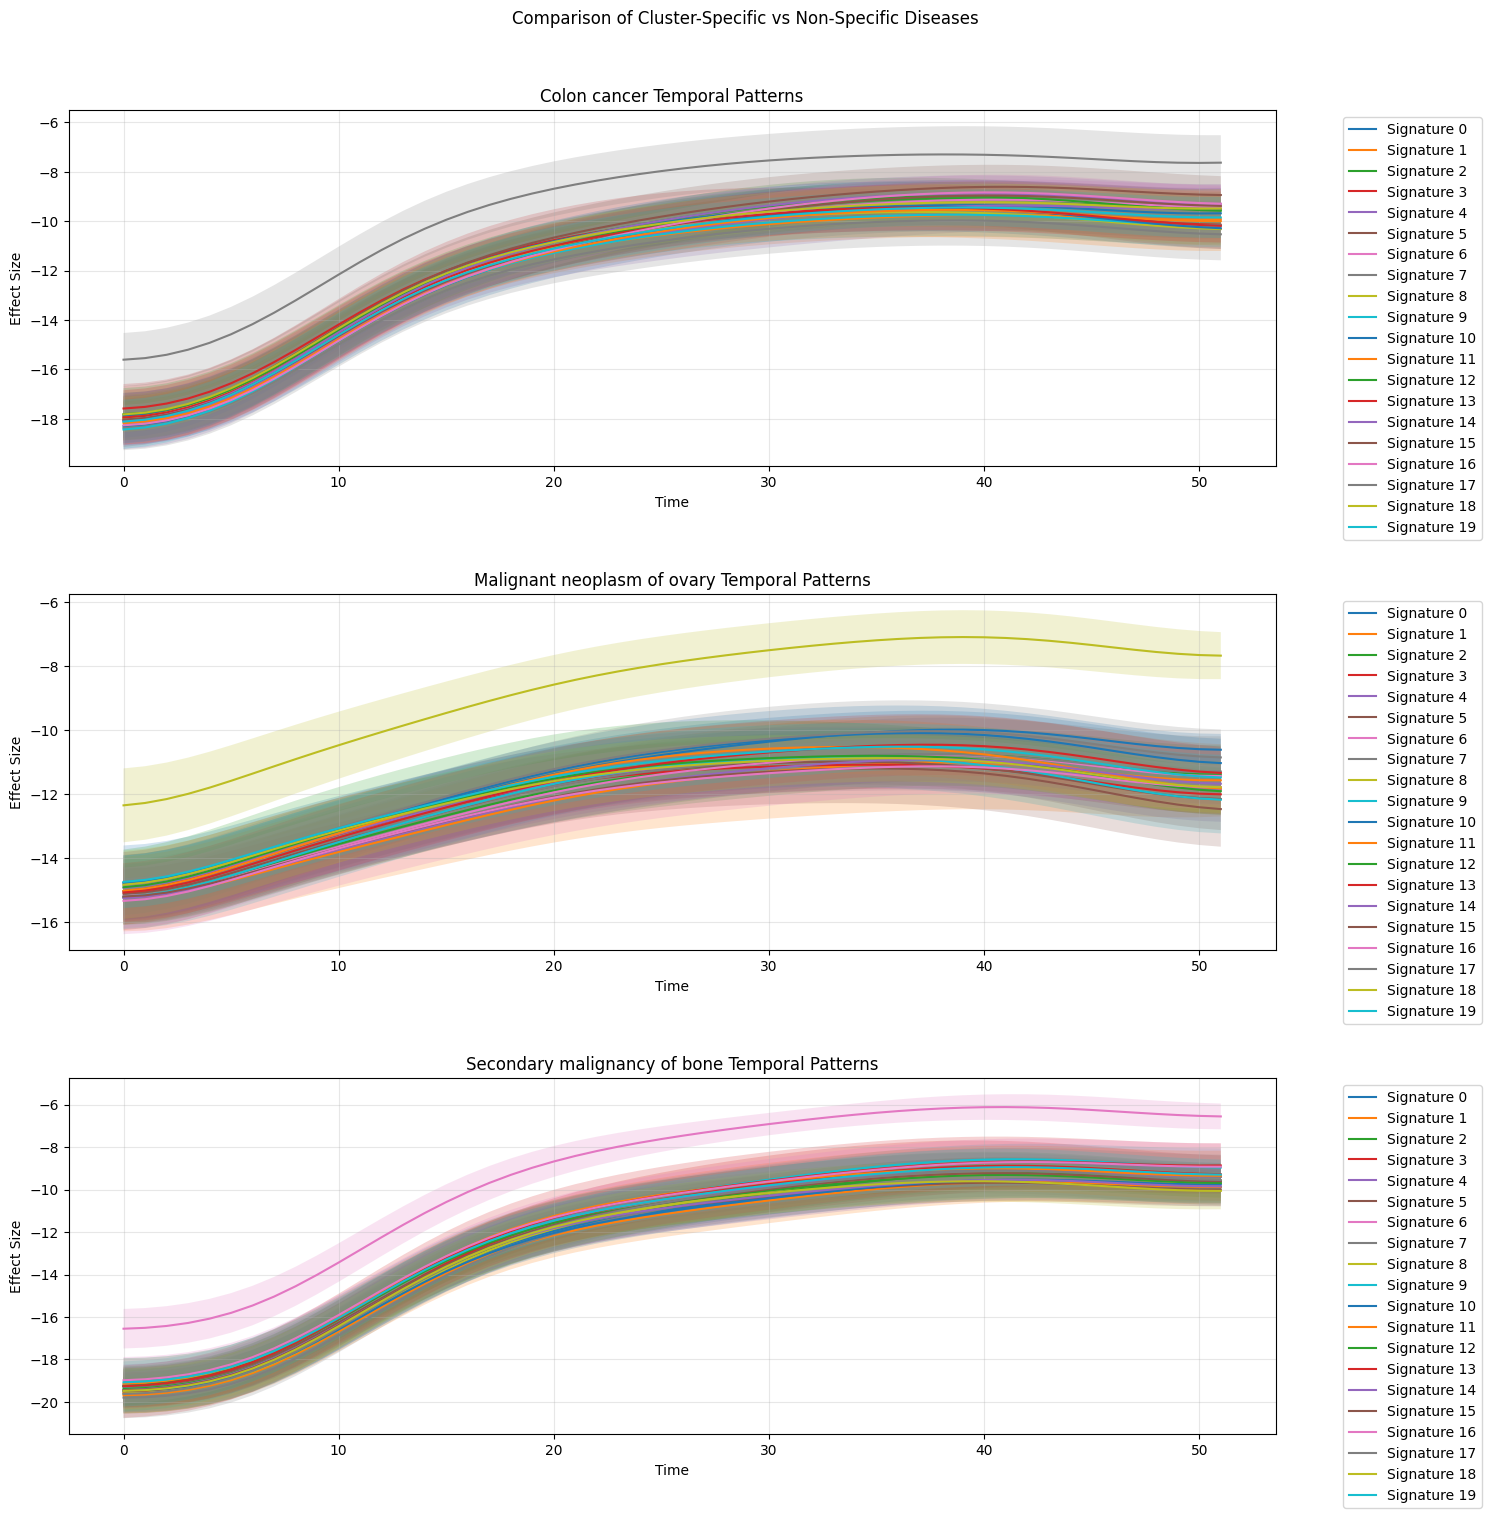

In [70]:
import torch
import numpy as np
import os
import glob

def analyze_pooled_cluster_patterns(base_dir):
    """
    Analyze patterns pooling across all model.pt files in subdirectories
    """
    # Get all output directories
    output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))
    
    # Initialize storage for pooled phi values
    first_model = torch.load(os.path.join(output_dirs[0], 'model.pt'))
    disease_names = first_model['disease_names']
    phi_shape = first_model['model_state_dict']['phi'].shape
    pooled_phi = np.zeros((len(output_dirs), *phi_shape))
    
    # Load and pool phi values
    for i, dir_path in enumerate(output_dirs):
        model_path = os.path.join(dir_path, 'model.pt')
        try:
            checkpoint = torch.load(model_path)
            phi = checkpoint['model_state_dict']['phi']
            if torch.is_tensor(phi):
                phi = phi.detach().cpu().numpy()
            pooled_phi[i] = phi
            
            # Use clusters from first model (assuming consistent across runs)
            if i == 0:
                clusters = checkpoint['clusters']
                
        except Exception as e:
            print(f"Error loading from {dir_path}: {e}")
    
    # Calculate mean and std of phi across all models
    mean_phi = np.mean(pooled_phi, axis=0)
    std_phi = np.std(pooled_phi, axis=0)
    
    # Analyze patterns for each cluster
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_diseases = np.where(clusters == cluster)[0]
        
        print(f"\nCluster {cluster} diseases:")
        print("------------------------")
        
        # Get average phi values for diseases in this cluster
        cluster_phi = mean_phi[:, cluster_diseases, :].mean(axis=2)  # Average over time
        cluster_phi_std = std_phi[:, cluster_diseases, :].mean(axis=2)  # Average std over time
        
        # Find dominant signature
        dominant_signature = np.argmax(np.abs(cluster_phi).mean(axis=1))
        
        # Sort diseases by their strength in the dominant signature
        disease_strengths = mean_phi[dominant_signature, cluster_diseases, :].mean(axis=1)
        disease_stds = std_phi[dominant_signature, cluster_diseases, :].mean(axis=1)
        sorted_indices = np.argsort(np.abs(disease_strengths))[::-1]
        
        # Print top 5 most characteristic diseases
        print(f"Top diseases (strongest in signature {dominant_signature}):")
        for idx in sorted_indices[:5]:
            disease_idx = cluster_diseases[idx]
            strength = disease_strengths[idx]
            std = disease_stds[idx]
            print(f"- {disease_names[disease_idx]}: strength = {strength:.3f} ± {std:.3f}")
        
        # Find non-specific diseases
        other_sigs = np.delete(np.arange(mean_phi.shape[0]), dominant_signature)
        non_specific_diseases = []
        
        for disease_idx in cluster_diseases:
            disease_phi = mean_phi[:, disease_idx, :].mean(axis=1)
            if np.any(np.abs(disease_phi[other_sigs]) > 0.5 * np.abs(disease_phi[dominant_signature])):
                non_specific_diseases.append(disease_idx)
        
        if non_specific_diseases:
            print("\nNon-specific diseases (strong effects in multiple signatures):")
            for disease_idx in non_specific_diseases[:5]:
                disease_phi = mean_phi[:, disease_idx, :].mean(axis=1)
                disease_phi_std = std_phi[:, disease_idx, :].mean(axis=1)
                print(f"\n{disease_names[disease_idx]}:")
                for sig in range(len(disease_phi)):
                    if abs(disease_phi[sig]) > 0.1:
                        print(f"  Signature {sig}: {disease_phi[sig]:.3f} ± {disease_phi_std[sig]:.3f}")
    
    return pooled_phi, disease_names, clusters

def plot_pooled_disease_patterns(pooled_phi, disease_names, disease_indices, title=None):
    """
    Plot temporal patterns with uncertainty bands for specific diseases
    """
    mean_phi = np.mean(pooled_phi, axis=0)
    std_phi = np.std(pooled_phi, axis=0)
    
    n_signatures = mean_phi.shape[0]
    n_timepoints = mean_phi.shape[2]
    
    plt.figure(figsize=(15, 5 * len(disease_indices)))
    
    for i, disease_idx in enumerate(disease_indices):
        plt.subplot(len(disease_indices), 1, i+1)
        
        for sig in range(n_signatures):
            mean_pattern = mean_phi[sig, disease_idx, :]
            std_pattern = std_phi[sig, disease_idx, :]
            
            plt.plot(range(n_timepoints), mean_pattern, label=f'Signature {sig}')
            plt.fill_between(range(n_timepoints), 
                           mean_pattern - std_pattern,
                           mean_pattern + std_pattern,
                           alpha=0.2)
        
        plt.title(f"{disease_names[disease_idx]} Temporal Patterns")
        plt.xlabel('Time')
        plt.ylabel('Effect Size')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
    
    if title:
        plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Usage:
base_dir = '/Users/sarahurbut/Dropbox (Personal)/results_10k_unsharedseed/'
pooled_phi, disease_names, clusters = analyze_pooled_cluster_patterns(base_dir)

# After identifying interesting diseases from the analysis:
interesting_diseases = [10, 20, 30]  # Replace with actual disease indices
plot_pooled_disease_patterns(pooled_phi, disease_names, interesting_diseases,
                           title="Comparison of Cluster-Specific vs Non-Specific Diseases")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/3328720815.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Disease: Colon cancer
Assigned signature (positive psi): 17


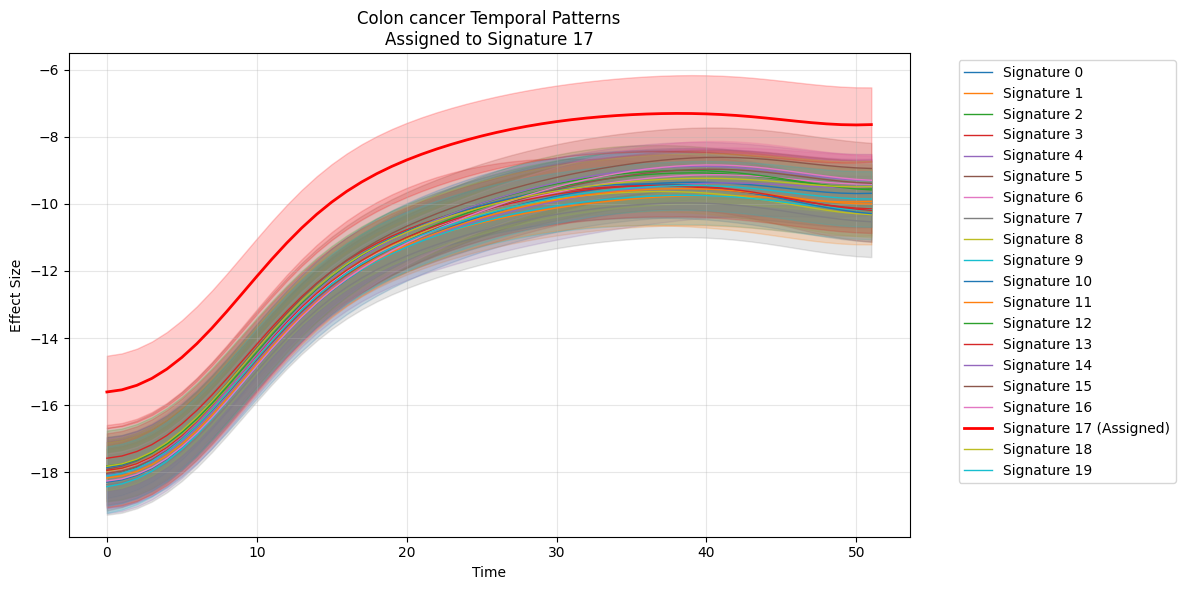


Average effect sizes across signatures:
Signature 0: -11.836 ± 0.998
Signature 1: -11.932 ± 0.896
Signature 2: -11.600 ± 0.833
Signature 3: -11.601 ± 0.983
Signature 4: -11.800 ± 1.042
Signature 5: -11.226 ± 0.995
Signature 6: -11.603 ± 0.907
Signature 7: -12.255 ± 0.977
Signature 8: -11.841 ± 0.732
Signature 9: -12.044 ± 0.786
Signature 10: -11.665 ± 0.888
Signature 11: -11.905 ± 0.963
Signature 12: -11.471 ± 0.790
Signature 13: -11.757 ± 0.936
Signature 14: -11.446 ± 0.806
Signature 15: -11.586 ± 0.745
Signature 16: -11.608 ± 0.709
Signature 17: -9.470 ± 1.116 *
Signature 18: -11.534 ± 0.748
Signature 19: -11.790 ± 0.826


In [79]:

def verify_disease_signature_specificity(base_dir, disease_idx):
    """
    Verify that the dominant signature matches the cluster assignment for a disease
    """
    # Load first model to get psi and cluster assignments
    first_model = torch.load(os.path.join(base_dir, 'output_0_10000_20241223_041640/model.pt'))
    psi = first_model['model_state_dict']['psi']
    disease_names = first_model['disease_names']
    
    if torch.is_tensor(psi):
        psi = psi.detach().cpu().numpy()
    
    # Find which signature has positive psi for this disease
    assigned_signature = np.where(psi[:, disease_idx] > 0)[0]
    print(f"\nDisease: {disease_names[disease_idx]}")
    print(f"Assigned signature (positive psi): {assigned_signature[0]}")
    
    # Now load and pool phi values across all models
    output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))
    phi_shape = first_model['model_state_dict']['phi'].shape
    pooled_phi = np.zeros((len(output_dirs), *phi_shape))
    
    for i, dir_path in enumerate(output_dirs):
        model_path = os.path.join(dir_path, 'model.pt')
        try:
            checkpoint = torch.load(model_path)
            phi = checkpoint['model_state_dict']['phi']
            if torch.is_tensor(phi):
                phi = phi.detach().cpu().numpy()
            pooled_phi[i] = phi
        except Exception as e:
            print(f"Error loading from {dir_path}: {e}")
    
    # Calculate mean phi
    mean_phi = np.mean(pooled_phi, axis=0)
    std_phi = np.std(pooled_phi, axis=0)
    
    # Plot temporal patterns with assigned signature highlighted
    plt.figure(figsize=(12, 6))
    
    for sig in range(mean_phi.shape[0]):
        mean_pattern = mean_phi[sig, disease_idx, :]
        std_pattern = std_phi[sig, disease_idx, :]
        
        # Highlight assigned signature
        if sig == assigned_signature:
            color = 'red'
            linewidth = 2
            label = f'Signature {sig} (Assigned)'
        else:
            color = f'C{sig}'
            linewidth = 1
            label = f'Signature {sig}'
        
        plt.plot(range(mean_pattern.shape[0]), mean_pattern, 
                label=label, color=color, linewidth=linewidth)
        plt.fill_between(range(mean_pattern.shape[0]), 
                        mean_pattern - std_pattern,
                        mean_pattern + std_pattern,
                        color=color, alpha=0.2)
    
    plt.title(f"{disease_names[disease_idx]} Temporal Patterns\nAssigned to Signature {assigned_signature[0]}")
    plt.xlabel('Time')
    plt.ylabel('Effect Size')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print effect sizes
    mean_effects = mean_phi[:, disease_idx, :].mean(axis=1)
    std_effects = std_phi[:, disease_idx, :].mean(axis=1)
    
    print("\nAverage effect sizes across signatures:")
    for sig in range(len(mean_effects)):
        star = " *" if sig == assigned_signature else ""
        print(f"Signature {sig}: {mean_effects[sig]:.3f} ± {std_effects[sig]:.3f}{star}")

# Usage:
base_dir = '/Users/sarahurbut/Dropbox (Personal)/results_10k_unsharedseed/'
disease_idx = 10  # Replace with the disease index you want to check
verify_disease_signature_specificity(base_dir, disease_idx)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/3328720815.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  first_model = torch.load(os.path.join(base_di


Disease: Bacterial infection NOS
Assigned signature (positive psi): 16


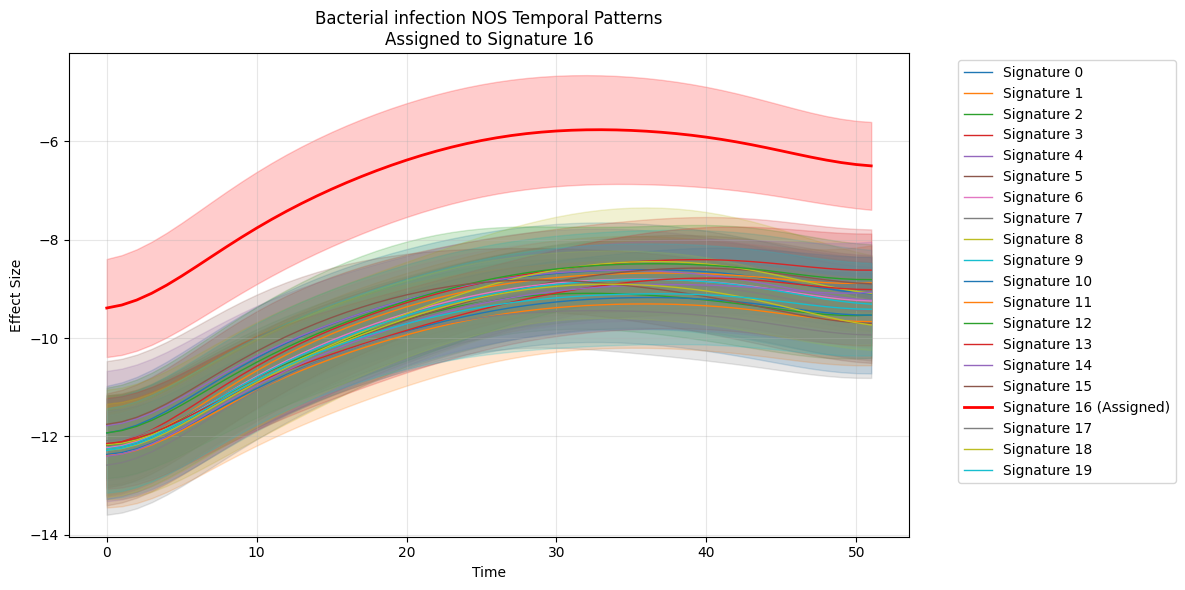


Average effect sizes across signatures:
Signature 0: -9.492 ± 0.946
Signature 1: -9.610 ± 0.722
Signature 2: -9.932 ± 0.824
Signature 3: -9.445 ± 0.948
Signature 4: -9.496 ± 0.884
Signature 5: -9.696 ± 0.819
Signature 6: -9.748 ± 0.930
Signature 7: -9.843 ± 0.944
Signature 8: -9.616 ± 1.069
Signature 9: -9.774 ± 1.052
Signature 10: -10.063 ± 0.913
Signature 11: -10.153 ± 0.987
Signature 12: -9.442 ± 0.967
Signature 13: -9.832 ± 0.957
Signature 14: -9.875 ± 0.906
Signature 15: -9.632 ± 0.884
Signature 16: -6.758 ± 1.074 *
Signature 17: -10.247 ± 0.873
Signature 18: -9.902 ± 0.758
Signature 19: -9.945 ± 0.951


In [80]:
verify_disease_signature_specificity(base_dir, 3)

['/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_0_10000_20241225_062028',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_100000_110000_20241225_225116',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_10000_20000_20241225_062028',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_110000_120000_20241225_225127',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_120000_130000_20241226_020120',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_130000_140000_20241226_020134',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_140000_150000_20241226_051212',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_150000_160000_20241226_051223',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_160000_170000_20241226_082535',
 '/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_170000_180000_20241226_082558',
 '/Users/sarahurbut/Dropbox 

NOw do all with same seed


In [2]:
import torch
import numpy as np
import os
import glob

# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/'

# List all output directories
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')))

# Initialize list to store all phis
all_phis = []

# Load phi from each model
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract phi - might need to adjust based on how it's stored
        if 'model_state_dict' in checkpoint:
            # If phi is in state dict
            phi = checkpoint['model_state_dict']['phi']
        else:
            # If phi is stored directly
            phi = checkpoint['phi']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(phi):
            phi = phi.detach().cpu().numpy()
            
        all_phis.append(phi)
        print(f"Loaded phi from {dir_path}")
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Convert list to numpy array
all_phis = np.array(all_phis)


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_61008/190028034.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_100000_110000_20241225_225116
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_110000_120000_20241225_225127
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_120000_130000_20241226_020120
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_130000_140000_20241226_020134
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_140000_150000_20241226_051212
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_150000_160000_20241226_051223
Loaded phi from /Users/sarahurbut/Dropbox (Personal)/fro

In [3]:
all_phis[3,5,7,:]

array([-14.4437685, -14.447313 , -14.424282 , -14.378359 , -14.314302 ,
       -14.237385 , -14.152662 , -14.064531 , -13.976446 , -13.890878 ,
       -13.809409 , -13.732987 , -13.662123 , -13.597082 , -13.537991 ,
       -13.484928 , -13.437833 , -13.396535 , -13.360718 , -13.329936 ,
       -13.303594 , -13.281114 , -13.2618885, -13.245349 , -13.231022 ,
       -13.218549 , -13.207606 , -13.197881 , -13.189055 , -13.18072  ,
       -13.172402 , -13.16368  , -13.154117 , -13.143393 , -13.13146  ,
       -13.1185   , -13.104954 , -13.0915   , -13.078987 , -13.0683155,
       -13.060321 , -13.055646 , -13.05455  , -13.056743 , -13.061204 ,
       -13.06601  , -13.068282 , -13.064287 , -13.049746 , -13.020224 ,
       -12.971797 , -12.9016905], dtype=float32)

In [58]:
all_phis.shape


(40, 20, 348, 52)

In [4]:
all_phis[2,5,7,:]

array([-14.443764 , -14.44731  , -14.424285 , -14.378359 , -14.314303 ,
       -14.237388 , -14.152664 , -14.064533 , -13.976445 , -13.890877 ,
       -13.809408 , -13.732985 , -13.662119 , -13.597078 , -13.537984 ,
       -13.484924 , -13.437828 , -13.396531 , -13.360714 , -13.329931 ,
       -13.30359  , -13.281111 , -13.261885 , -13.245345 , -13.231022 ,
       -13.218551 , -13.207607 , -13.197883 , -13.189056 , -13.180721 ,
       -13.172404 , -13.16368  , -13.154115 , -13.143393 , -13.131459 ,
       -13.118497 , -13.104952 , -13.091496 , -13.078985 , -13.068313 ,
       -13.06032  , -13.055645 , -13.054548 , -13.056743 , -13.061205 ,
       -13.066012 , -13.068286 , -13.06429  , -13.049749 , -13.020227 ,
       -12.971799 , -12.9016905], dtype=float32)

In [5]:
# Calculate statistics
mean_phi = np.mean(all_phis, axis=0)
std_phi = np.std(all_phis, axis=0)
ci_phi = 1.96 * std_phi / np.sqrt(len(all_phis))  # 95% CI

# Save results
np.save('mean_phi_same.npy', mean_phi)
np.save('std_phi_same.npy', std_phi)
np.save('ci_phi_same.npy', ci_phi)


In [48]:

# Select some interesting diseases and signatures to plot
diseases_to_plot = [0, 1, 2]  # replace with actual disease indices of interest
signatures_to_plot = [0, 1, 2]  # replace with signatures of interest

# Create plots
for k in signatures_to_plot:
    for d in diseases_to_plot:
        plt.figure(figsize=(12, 6))
        
        # Plot individual batch trajectories in light gray
        for batch_phi in all_phis:
            plt.plot(batch_phi[k, d, :], color='gray', alpha=0.2)
        
        # Plot mean trajectory in bold
        plt.plot(mean_phi[k, d, :], color='blue', linewidth=2, label='Mean')
        
        # Add confidence intervals
        std_phi = np.std(all_phis[:, k, d, :], axis=0)
        ci = 1.96 * std_phi / np.sqrt(len(all_phis))
        plt.fill_between(range(mean_phi.shape[2]), 
                        mean_phi[k, d, :] - ci,
                        mean_phi[k, d, :] + ci,
                        alpha=0.2, color='blue')
        
        plt.title(f'Signature {k}, Disease {d} Temporal Pattern')
        plt.xlabel('Time')
        plt.ylabel('Phi Value')
        plt.grid(True, alpha=0.3)
        plt.savefig(f'phi_trajectory_sig{k}_disease{d}_sameseed.png')
        plt.close()

In [123]:
import torch
import numpy as np
import os
import glob

# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/'

# List all output directories
# List all output directories
dir_path = sorted(glob.glob(os.path.join(base_dir, 'output_10000_20000_20241225_062028')))



In [125]:
dir_path

['/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028']

In [124]:


model_path = os.path.join(dir_path, 'model.pt')
checkpoint = torch.load(model_path)
ytest=checkpoint['Y']
indes=checkpoint['indices']

TypeError: expected str, bytes or os.PathLike object, not list

In [109]:
Yt=torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/Y_tensor.pt")
E=torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/E_matrix.pt")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/1397768674.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Yt=torch.load("/Users/sarahurbut/Dropbox (Per

In [116]:
# Python
# Assuming E is a numpy array
indices = np.where(E[10000,:] != 51)[0]
values = E[10000,indices]
print("Positions:", indices)
print("Values:", values)

# To see position-value pairs:
for pos, val in zip(indices, values):
    print(f"Position {pos}: {val}")

    

Positions: [ 90 109 180 230 299 344 347]
Values: tensor([42, 42, 38, 42, 35, 35, 42])
Position 90: 42
Position 109: 42
Position 180: 38
Position 230: 42
Position 299: 35
Position 344: 35
Position 347: 42


In [118]:
Yt[10000,90,42]

tensor(1.)

In [4]:
import rpy2.robjects as robjects
import numpy as np

# Load the original sparse array from R
r_sparse = robjects.r.readRDS('/Users/sarahurbut/Dropbox (Personal)/withsparse/sparse_array.rds')
matrix = r_sparse[0]  # Get first timepoint

# Try to get rownames using R functions directly
try:
    # Convert to R matrix first
    robjects.r('''
        get_rownames <- function(sparse_matrix) {
            rownames(sparse_matrix)
        }
    ''')
    get_rownames = robjects.globalenv['get_rownames']
    all_patient_ids = np.array(get_rownames(matrix))
    print(f"Successfully extracted {len(all_patient_ids)} patient IDs")
except Exception as e:
    print(f"Error with R method: {e}")
    try:
        # Alternative: try getting directly from matrix slots
        all_patient_ids = np.array(matrix.slots['Dimnames'][0])
        print(f"Got IDs from slots: {len(all_patient_ids)} IDs")
    except Exception as e2:
        print(f"Error with slots method: {e2}")

# Verify we have the IDs
if 'all_patient_ids' in locals():
    print("First few IDs:", all_patient_ids[:5])
    
    def get_batch_ids(start_idx, end_idx):
        return all_patient_ids[start_idx:end_idx]

    # Example: get IDs for first batch
    batch_0_10k_ids = get_batch_ids(0, 10000)
    print(f"First batch IDs: {batch_0_10k_ids[:5]}...")
else:
    print("Failed to get patient IDs")



R[write to console]: Loading required package: Matrix



Successfully extracted 407878 patient IDs
First few IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']
First batch IDs: ['1000015' '1000023' '1000037' '1000042' '1000059']...


In [129]:
import numpy as np

# Convert to numpy array if not already
patient_ids = np.array(all_patient_ids)

# Save to file
np.save('patient_ids.npy', patient_ids)

In [1]:
import os
import glob
import numpy as np
import torch
import re

# Base directory containing all output folders
base_dir = '/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/'

# List all output directories and sort them properly by their index numbers
def sort_by_index(dir_name):
    # Extract just the start number from directory name
    # e.g., from 'output_10000_20000_20241225_062028' get '10000'
    match = re.search(r'output_(\d+)_\d+_\d+', dir_name)
    if match:
        return int(match.group(1))
    return 0

# Test the sorting
output_dirs = sorted(glob.glob(os.path.join(base_dir, 'output_*')), key=sort_by_index)

# Print first few directories to verify sorting
print("Verifying directory sorting:")
for dir_path in output_dirs[:5]:
    print(dir_path)


# Initialize the full array
all_lambdas = np.zeros((400000, 20, 52))  # [n_individuals, n_signatures, n_timepoints]

# Keep track of processed indices
processed_ranges = []

# Load and combine lambda from each model
current_idx = 0
for dir_path in output_dirs:
    model_path = os.path.join(dir_path, 'model.pt')
    try:
        # Extract batch range from directory name
        batch_range = re.findall(r'output_(\d+)_(\d+)', os.path.basename(dir_path))
        if batch_range:
            start_idx, end_idx = map(int, batch_range[0])
            print(f"\nProcessing batch {start_idx}-{end_idx}")
            
            # Verify this matches our current_idx
            if current_idx != start_idx:
                print(f"WARNING: Index mismatch! current_idx={current_idx}, but batch starts at {start_idx}")
        
        # Load the saved model
        checkpoint = torch.load(model_path)
        
        # Extract lambda
        if 'model_state_dict' in checkpoint:
            lambda_values = checkpoint['model_state_dict']['lambda_']
        else:
            lambda_values = checkpoint['lambda_']
            
        # Convert to numpy if it's a tensor
        if torch.is_tensor(lambda_values):
            lambda_values = lambda_values.detach().cpu().numpy()
        
        # Get batch size
        batch_size = lambda_values.shape[0]
        
        # Add to the full array
        all_lambdas[current_idx:current_idx + batch_size] = lambda_values
        
        # Store processed range
        processed_ranges.append((current_idx, current_idx + batch_size))
        
        print(f"Loaded lambda from {dir_path}")
        print(f"Batch size: {batch_size}")
        print(f"Current index range: {current_idx} to {current_idx + batch_size}")
        
        current_idx += batch_size
        
    except Exception as e:
        print(f"Error loading from {dir_path}: {e}")

# Verify no gaps or overlaps in processed ranges
processed_ranges.sort()
for i in range(len(processed_ranges)-1):
    if processed_ranges[i][1] != processed_ranges[i+1][0]:
        print(f"WARNING: Gap or overlap between batches! {processed_ranges[i]} and {processed_ranges[i+1]}")

# Save the combined lambdas
#np.save('all_lambdas_combined.npy', all_lambdas)

# Print final verification
print("\nFinal verification:")
print("Shape of all_lambdas:", all_lambdas.shape)
print("Total individuals processed:", current_idx)
print("Processed ranges:", processed_ranges)

# Load patient IDs and verify length matches
patient_ids = np.load('/Users/sarahurbut/Dropbox (Personal)/patient_ids.npy')
# Verify dimensions
print("Total available patient IDs:", len(patient_ids))  # Should be 407,878
print("Processed lambda shape:", all_lambdas.shape)      # Should be (400000, 20, 52)

# Create mapping of processed IDs
processed_ids = patient_ids[:400000]  # Get just the first 400K IDs we processed
print("\nVerification of processed IDs:")
print("Number of processed IDs:", len(processed_ids))
print("First few IDs:", processed_ids[:5])
print("Last few IDs:", processed_ids[-5:])

# Save the processed IDs mapping
np.save('processed_patient_ids.npy', processed_ids)

# Print some stats about unprocessed patients
unprocessed_ids = patient_ids[400000:]
print("\nUnprocessed patients:")
print("Number of unprocessed IDs:", len(unprocessed_ids))
print("First few unprocessed IDs:", unprocessed_ids[:5])

Verifying directory sorting:
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_20000_30000_20241225_093441
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_30000_40000_20241225_093452
/Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_40000_50000_20241225_124544

Processing batch 0-10000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_0_10000_20241225_062028
Batch size: 10000
Current index range: 0 to 10000

Processing batch 10000-20000


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/622470184.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_10000_20000_20241225_062028
Batch size: 10000
Current index range: 10000 to 20000

Processing batch 20000-30000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_20000_30000_20241225_093441
Batch size: 10000
Current index range: 20000 to 30000

Processing batch 30000-40000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_30000_40000_20241225_093452
Batch size: 10000
Current index range: 30000 to 40000

Processing batch 40000-50000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_40000_50000_20241225_124544
Batch size: 10000
Current index range: 40000 to 50000

Processing batch 50000-60000
Loaded lambda from /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_50000_60000_20241225_124613
Batch size: 10000
Current index range: 50000 to 60000

Processin

In [2]:
all_lambdas[3,5,]


array([ 1.57699907,  1.62946928,  1.66382968,  1.67942309,  1.67615604,
        1.65449083,  1.61543989,  1.56052983,  1.49170721,  1.41127193,
        1.32176745,  1.2258563 ,  1.1262126 ,  1.02539384,  0.92574048,
        0.8292858 ,  0.73767626,  0.65213102,  0.57342833,  0.50189668,
        0.43746039,  0.37968889,  0.32786992,  0.28108975,  0.23832646,
        0.19853681,  0.16074316,  0.12409149,  0.08791837,  0.05177954,
        0.01546245, -0.0210146 , -0.05743361, -0.09341191, -0.12845056,
       -0.16200066, -0.19351083, -0.2224879 , -0.24854584, -0.27144241,
       -0.291098  , -0.30760399, -0.32122532, -0.33237183, -0.34157059,
       -0.34942397, -0.35658249, -0.36366299, -0.37124053, -0.37979689,
       -0.3896856 , -0.40111545])

In [5]:
bpc = robjects.r.readRDS('/Users/sarahurbut/Downloads/baseline_withPCS.rds')

In [7]:
print(bpc)

     identifier f.31.0.0 f.34.0.0   f.53.0.0   f.53.1.0   f.53.2.0   f.53.3.0
1       1000015        1     1938 2008-07-23       <NA>       <NA>       <NA>
2       1000023        1     1963 2008-09-11       <NA>       <NA>       <NA>
3       1000037        0     1939 2009-01-22       <NA>       <NA>       <NA>
4       1000042        1     1942 2009-11-13       <NA>       <NA>       <NA>
5       1000059        0     1954 2009-05-20       <NA>       <NA>       <NA>
6       1000061        0     1960 2008-02-07       <NA>       <NA>       <NA>
7       1000078        0     1946 2009-05-30       <NA>       <NA>       <NA>
8       1000086        0     1961 2009-10-21       <NA>       <NA>       <NA>
9       1000090        0     1946 2006-05-16       <NA>       <NA>       <NA>
10      1000107        0     1959 2009-02-05       <NA> 2017-07-18       <NA>
11      1000113        1     1946 2010-02-09       <NA>       <NA>       <NA>
12      1000125        0     1969 2009-10-12       <NA>       <N

In [8]:
def softmax(x):
    """
    Compute softmax values for each set of scores in x.
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back to original shape
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Calculate thetas using softmax
all_thetas = softmax(all_lambdas)  # shape: (400000, 20, 52)

# Calculate AUC
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(20)]).T


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/2601109579.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(20)]).T


In [13]:
all_thetas[1,:,3]

array([0.01063003, 0.04387812, 0.01406747, 0.13332848, 0.13999174,
       0.04509832, 0.01915406, 0.09317365, 0.06227278, 0.01746923,
       0.02721981, 0.01640357, 0.03193431, 0.07858801, 0.01514994,
       0.08144726, 0.04033603, 0.105246  , 0.00519665, 0.01941454])

In [14]:
def softmax_single(x):
    """
    Compute softmax for a single timepoint
    x shape: (n_signatures,)
    """
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

def softmax_full(x):
    """
    Compute softmax for full array
    x shape: (n_individuals, n_signatures, n_timepoints)
    """
    # Reshape to (n_individuals * n_timepoints, n_signatures)
    x_reshaped = x.transpose(0, 2, 1).reshape(-1, x.shape[1])
    
    # Compute softmax
    e_x = np.exp(x_reshaped - np.max(x_reshaped, axis=1, keepdims=True))
    softmax_x = e_x / np.sum(e_x, axis=1, keepdims=True)
    
    # Reshape back
    return softmax_x.reshape(x.shape[0], x.shape[2], x.shape[1]).transpose(0, 2, 1)

# Let's check a few random people at different timepoints
sample_people = [0, 100, 399999]  # First, middle, and last person
sample_timepoints = [0, 25, 51]   # First, middle, and last timepoint

print("Verifying lambda to theta conversion:")
for person in sample_people:
    print(f"\nPerson {person} (ID: {patient_ids[person]}):")
    
    for t in sample_timepoints:
        print(f"\nTimepoint {t}:")
        
        # Get lambdas for this person at this timepoint
        lambdas_t = all_lambdas[person, :, t]
        print("Lambdas:")
        for s in range(20):
            print(f"Signature {s+1}: {lambdas_t[s]:.4f}")
        
        # Calculate thetas using softmax
        thetas_t = softmax_single(lambdas_t)
        print("\nThetas (after softmax):")
        for s in range(20):
            print(f"Signature {s+1}: {thetas_t[s]:.4f}")
            
        # Verify sum to 1
        print(f"\nSum of thetas: {np.sum(thetas_t):.6f}")
        
        # Show top 3 signatures at this timepoint
        top_sigs = np.argsort(thetas_t)[-3:][::-1]
        print("\nTop 3 signatures:")
        for s in top_sigs:
            print(f"Signature {s+1}: {thetas_t[s]:.4f}")

# Calculate full theta array
all_thetas = softmax_full(all_lambdas)

# Verify shapes
print("\nArray shapes:")
print(f"Lambda array shape: {all_lambdas.shape}")
print(f"Theta array shape: {all_thetas.shape}")

Verifying lambda to theta conversion:

Person 0 (ID: 1000015):

Timepoint 0:
Lambdas:
Signature 1: -0.9725
Signature 2: 1.0956
Signature 3: 0.9542
Signature 4: -1.4610
Signature 5: 1.4508
Signature 6: 1.2617
Signature 7: 1.4442
Signature 8: 0.5232
Signature 9: -0.0611
Signature 10: 0.0414
Signature 11: -0.4500
Signature 12: 1.1507
Signature 13: 0.1874
Signature 14: -0.0070
Signature 15: -0.1920
Signature 16: 1.7625
Signature 17: -1.4313
Signature 18: -0.5677
Signature 19: -0.7202
Signature 20: 0.0943

Thetas (after softmax):
Signature 1: 0.0102
Signature 2: 0.0810
Signature 3: 0.0703
Signature 4: 0.0063
Signature 5: 0.1155
Signature 6: 0.0956
Signature 7: 0.1147
Signature 8: 0.0457
Signature 9: 0.0255
Signature 10: 0.0282
Signature 11: 0.0173
Signature 12: 0.0855
Signature 13: 0.0326
Signature 14: 0.0269
Signature 15: 0.0223
Signature 16: 0.1577
Signature 17: 0.0065
Signature 18: 0.0153
Signature 19: 0.0132
Signature 20: 0.0297

Sum of thetas: 1.000000

Top 3 signatures:
Signature 16: 

In [15]:

softmax_single(all_lambdas[1,:,1])

array([0.01075749, 0.04174133, 0.01236625, 0.14625188, 0.13679618,
       0.03809534, 0.02233924, 0.09782585, 0.07387062, 0.01759529,
       0.02754722, 0.01361824, 0.02753008, 0.07331311, 0.01398763,
       0.08847629, 0.0433737 , 0.08821341, 0.00426847, 0.02203236])

In [16]:
all_thetas[1,:,1]

array([0.01075749, 0.04174133, 0.01236625, 0.14625188, 0.13679618,
       0.03809534, 0.02233924, 0.09782585, 0.07387062, 0.01759529,
       0.02754722, 0.01361824, 0.02753008, 0.07331311, 0.01398763,
       0.08847629, 0.0433737 , 0.08821341, 0.00426847, 0.02203236])

In [20]:
person_idx = 0

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()
thetas_person[:,0]

array([0.01023533, 0.08096029, 0.07028231, 0.00627936, 0.11547649,
       0.09558394, 0.1147219 , 0.0456719 , 0.02546299, 0.02821098,
       0.01725846, 0.08554672, 0.03264462, 0.02687726, 0.02233783,
       0.15772179, 0.0064689 , 0.01534278, 0.0131727 , 0.02974346])


Signature 20 AUC: 3.731
Mean theta: 0.074

Signature 9 AUC: 5.579
Mean theta: 0.108

Signature 6 AUC: 5.350
Mean theta: 0.104


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/3816044577.py:28: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(thetas_person[sig], timepoints)


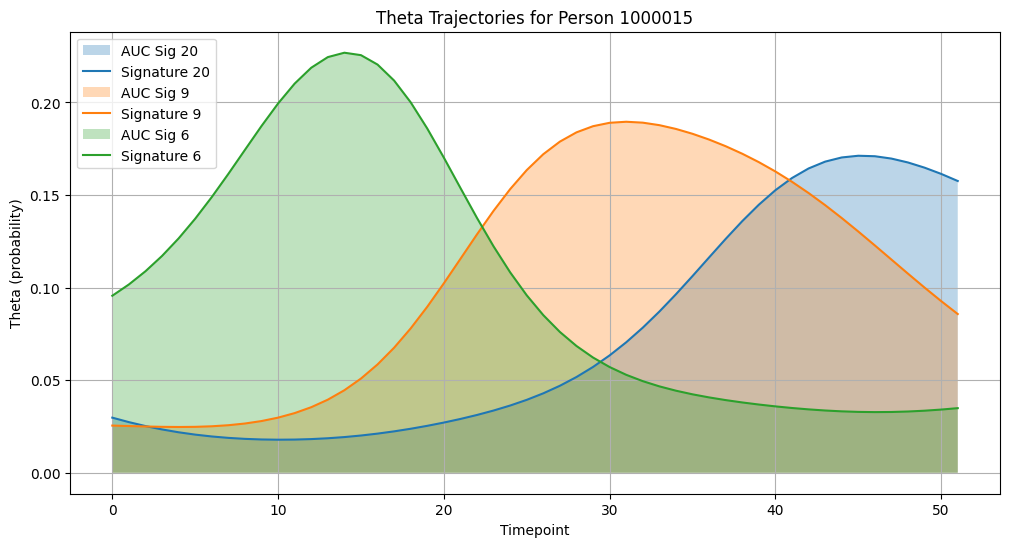

In [21]:
import matplotlib.pyplot as plt

# Take one person as an example
person_idx = 0

# Calculate thetas for this person
thetas_person = torch.softmax(torch.tensor(all_lambdas[person_idx]), dim=0).numpy()

# Plot trajectories for a few signatures
plt.figure(figsize=(12, 6))
timepoints = np.arange(52)

# Plot top 3 signatures by max value
top_sigs = np.argsort(np.max(thetas_person, axis=1))[-3:]

for sig in top_sigs:
    plt.fill_between(timepoints, 0, thetas_person[sig], alpha=0.3, label=f'AUC Sig {sig+1}')
    plt.plot(timepoints, thetas_person[sig], label=f'Signature {sig+1}')

plt.title(f'Theta Trajectories for Person {patient_ids[person_idx]}')
plt.xlabel('Timepoint')
plt.ylabel('Theta (probability)')
plt.legend()
plt.grid(True)

# Calculate and print AUCs for these signatures
for sig in top_sigs:
    auc = np.trapz(thetas_person[sig], timepoints)
    print(f"\nSignature {sig+1} AUC: {auc:.3f}")
    print(f"Mean theta: {np.mean(thetas_person[sig]):.3f}")

In [19]:
len(patient_ids)

407878

In [30]:
patient_ids[0:5]

array(['1000015', '1000023', '1000037', '1000042', '1000059'], dtype='<U7')

In [31]:
import numpy as np
import torch

# Calculate thetas for all individuals
print("Calculating thetas...")
all_thetas = torch.softmax(torch.tensor(all_lambdas), dim=1).numpy()

# Use only the first 400K patients
patient_ids = patient_ids[:400000]
print(f"Number of processed IDs: {len(processed_ids)}")

# Calculate AUC for each person and signature
print("Calculating AUCs...")
timepoints = np.arange(52)
theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(20)]).T

# Create REGENIE phenotype file
output_file = 'signature_auc_phenotypes_new.txt'
print(f"\nCreating REGENIE phenotype file: {output_file}")

with open(output_file, 'w') as f:
    # Write header
    header = ['FID', 'IID'] + [f'SIG{i+1}_AUC' for i in range(20)]
    f.write('\t'.join(header) + '\n')
    
    # Write data for each person
    for i in range(len(patient_ids)):
        fid = patient_ids[i]
        iid = patient_ids[i]
        aucs = theta_aucs[i]
        
        line = [str(fid), str(iid)] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Print summary statistics
print("\nSummary statistics for signature AUCs:")
for sig in range(20):
    print(f"\nSignature {sig+1}:")
    print(f"Mean: {np.mean(theta_aucs[:, sig]):.4f}")
    print(f"Std: {np.std(theta_aucs[:, sig]):.4f}")
    print(f"Min: {np.min(theta_aucs[:, sig]):.4f}")
    print(f"Max: {np.max(theta_aucs[:, sig]):.4f}")

# Save numpy array version too
np.save('signature_aucs_new.npy', theta_aucs)

print("\nFiles created:")
print(f"1. {output_file} - REGENIE format")
print("2. signature_aucs.npy - NumPy array")

# Quick verification of a few random individuals
print("\nVerifying random individuals:")
for idx in np.random.choice(len(patient_ids), 3):
    print(f"\nPerson {patient_ids[idx]}:")
    print("AUCs:", theta_aucs[idx])
    print("Sum of AUCs:", np.sum(theta_aucs[idx]))  # Note: won't necessarily sum to 52 (total timepoints)

Calculating thetas...
Number of processed IDs: 400000
Calculating AUCs...


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/1407345432.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs = np.array([np.trapz(all_thetas[:, s, :], timepoints) for s in range(20)]).T



Creating REGENIE phenotype file: signature_auc_phenotypes_new.txt

Summary statistics for signature AUCs:

Signature 1:
Mean: 2.5491
Std: 1.9036
Min: 0.1160
Max: 22.8440

Signature 2:
Mean: 2.5505
Std: 1.9289
Min: 0.1067
Max: 18.8861

Signature 3:
Mean: 2.5170
Std: 1.8609
Min: 0.1117
Max: 21.2460

Signature 4:
Mean: 2.5230
Std: 1.9095
Min: 0.1136
Max: 19.1575

Signature 5:
Mean: 2.5408
Std: 1.8979
Min: 0.1226
Max: 17.3734

Signature 6:
Mean: 2.6476
Std: 2.2507
Min: 0.0477
Max: 31.1047

Signature 7:
Mean: 2.5494
Std: 1.9189
Min: 0.0737
Max: 19.3823

Signature 8:
Mean: 2.5566
Std: 1.9146
Min: 0.1088
Max: 20.9530

Signature 9:
Mean: 2.5182
Std: 1.8696
Min: 0.1226
Max: 18.7159

Signature 10:
Mean: 2.5633
Std: 1.9499
Min: 0.1011
Max: 24.3861

Signature 11:
Mean: 2.5566
Std: 1.8972
Min: 0.1055
Max: 19.8881

Signature 12:
Mean: 2.5323
Std: 1.8809
Min: 0.1040
Max: 18.5127

Signature 13:
Mean: 2.5252
Std: 1.9231
Min: 0.0955
Max: 18.7850

Signature 14:
Mean: 2.5493
Std: 1.9483
Min: 0.0753
Max: 

In [32]:
# Verification checks
print("Data shape verification:")
print(f"all_lambdas shape: {all_lambdas.shape}")  # Should be (400000, 20, 52)
print(f"all_thetas shape: {all_thetas.shape}")    # Should be (400000, 20, 52)
print(f"theta_aucs shape: {theta_aucs.shape}")    # Should be (400000, 20)
print(f"Number of processed_ids: {len(processed_ids)}")  # Should be 400000

# Check first few IDs to ensure consistency
print("\nFirst few IDs verification:")
for i in range(5):
    print(f"\nIndex {i}:")
    print(f"Patient ID: {processed_ids[i]}")
    print(f"Has lambda values: {not np.all(all_lambdas[i] == 0)}")
    print(f"Has theta values: {not np.all(all_thetas[i] == 0)}")
    print(f"AUC values: {theta_aucs[i][:3]}...")  # Show first 3 AUCs

Data shape verification:
all_lambdas shape: (400000, 20, 52)
all_thetas shape: (400000, 20, 52)
theta_aucs shape: (400000, 20)
Number of processed_ids: 400000

First few IDs verification:

Index 0:
Patient ID: 1000015
Has lambda values: True
Has theta values: True
AUC values: [2.97618507 2.32408142 2.80664236]...

Index 1:
Patient ID: 1000023
Has lambda values: True
Has theta values: True
AUC values: [1.71599675 3.54975304 1.64124719]...

Index 2:
Patient ID: 1000037
Has lambda values: True
Has theta values: True
AUC values: [1.10165736 3.97846929 2.65674567]...

Index 3:
Patient ID: 1000042
Has lambda values: True
Has theta values: True
AUC values: [10.79551816  1.41698514  0.39011436]...

Index 4:
Patient ID: 1000059
Has lambda values: True
Has theta values: True
AUC values: [0.73067043 1.73200054 1.11793182]...


In [38]:

print("\nSummary statistics for theta AUCs:")
for sig in range(20):
    print(f"\nSignature {sig+1}:")
    print(f"Mean: {np.mean(theta_aucs[:, sig]):.4f}")
    print(f"Std: {np.std(theta_aucs[:, sig]):.4f}")
    print(f"Min: {np.min(theta_aucs[:, sig]):.4f}")
    print(f"Max: {np.max(theta_aucs[:, sig]):.4f}")

# Calculate AUC for each person and signature
for i in range(400000):
    for s in range(20):
        theta_aucs[i, s] = np.trapz(all_thetas[i, s, :], timepoints)

# 2. Load and process covariates from R
# Convert R dataframe to pandas
bpc_pd = pd.DataFrame({
    'identifier': robjects.r.rownames(bpc),
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add PCs
for i in range(1, 41):  # assuming 40 PCs
    col_name = f'f.22009.0.{i}'
    if col_name in bpc.names:
        bpc_pd[f'PC{i}'] = np.array(bpc.rx2(col_name))



Summary statistics for theta AUCs:

Signature 1:
Mean: 2.5491
Std: 1.9036
Min: 0.1160
Max: 22.8440

Signature 2:
Mean: 2.5505
Std: 1.9289
Min: 0.1067
Max: 18.8861

Signature 3:
Mean: 2.5170
Std: 1.8609
Min: 0.1117
Max: 21.2460

Signature 4:
Mean: 2.5230
Std: 1.9095
Min: 0.1136
Max: 19.1575

Signature 5:
Mean: 2.5408
Std: 1.8979
Min: 0.1226
Max: 17.3734

Signature 6:
Mean: 2.6476
Std: 2.2507
Min: 0.0477
Max: 31.1047

Signature 7:
Mean: 2.5494
Std: 1.9189
Min: 0.0737
Max: 19.3823

Signature 8:
Mean: 2.5566
Std: 1.9146
Min: 0.1088
Max: 20.9530

Signature 9:
Mean: 2.5182
Std: 1.8696
Min: 0.1226
Max: 18.7159

Signature 10:
Mean: 2.5633
Std: 1.9499
Min: 0.1011
Max: 24.3861

Signature 11:
Mean: 2.5566
Std: 1.8972
Min: 0.1055
Max: 19.8881

Signature 12:
Mean: 2.5323
Std: 1.8809
Min: 0.1040
Max: 18.5127

Signature 13:
Mean: 2.5252
Std: 1.9231
Min: 0.0955
Max: 18.7850

Signature 14:
Mean: 2.5493
Std: 1.9483
Min: 0.0753
Max: 24.4520

Signature 15:
Mean: 2.5316
Std: 1.9195
Min: 0.0811
Max: 23.742

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/3858643878.py:12: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  theta_aucs[i, s] = np.trapz(all_thetas[i, s, :], timepoints)


In [40]:

# Create REGENIE phenotype file with patient IDs and theta AUCs
output_file = 'theta_auc_phenotypes_for_regenie_new.txt'

print("\nPreparing REGENIE phenotype file...")
with open(output_file, 'w') as f:
    # Write header
    header = ['FID', 'IID'] + [f'theta_auc_{i+1}' for i in range(20)]
    f.write('\t'.join(header) + '\n')
    
    # Write data for each person
    for i in range(len(patient_ids)):
        fid = patient_ids[i]
        iid = patient_ids[i]
        
        # Get AUC values for this person
        person_aucs = theta_aucs[i]
        
        # Create line with FID, IID, and AUC values
        line = [str(fid), str(iid)] + [f"{x:.6f}" for x in person_aucs]
        f.write('\t'.join(line) + '\n')

# Print summary statistics
print("\nSummary statistics for theta AUCs:")
for sig in range(20):
    print(f"\nSignature {sig+1}:")
    print(f"Mean: {np.mean(theta_aucs[:, sig]):.4f}")
    print(f"Std: {np.std(theta_aucs[:, sig]):.4f}")
    print(f"Min: {np.min(theta_aucs[:, sig]):.4f}")
    print(f"Max: {np.max(theta_aucs[:, sig]):.4f}")

# Save covariates file
covariates_file = 'regenie_covariates.txt'
bpc_pd.to_csv(covariates_file, sep='\t', index=False)




Preparing REGENIE phenotype file...

Summary statistics for theta AUCs:

Signature 1:
Mean: 2.5491
Std: 1.9036
Min: 0.1160
Max: 22.8440

Signature 2:
Mean: 2.5505
Std: 1.9289
Min: 0.1067
Max: 18.8861

Signature 3:
Mean: 2.5170
Std: 1.8609
Min: 0.1117
Max: 21.2460

Signature 4:
Mean: 2.5230
Std: 1.9095
Min: 0.1136
Max: 19.1575

Signature 5:
Mean: 2.5408
Std: 1.8979
Min: 0.1226
Max: 17.3734

Signature 6:
Mean: 2.6476
Std: 2.2507
Min: 0.0477
Max: 31.1047

Signature 7:
Mean: 2.5494
Std: 1.9189
Min: 0.0737
Max: 19.3823

Signature 8:
Mean: 2.5566
Std: 1.9146
Min: 0.1088
Max: 20.9530

Signature 9:
Mean: 2.5182
Std: 1.8696
Min: 0.1226
Max: 18.7159

Signature 10:
Mean: 2.5633
Std: 1.9499
Min: 0.1011
Max: 24.3861

Signature 11:
Mean: 2.5566
Std: 1.8972
Min: 0.1055
Max: 19.8881

Signature 12:
Mean: 2.5323
Std: 1.8809
Min: 0.1040
Max: 18.5127

Signature 13:
Mean: 2.5252
Std: 1.9231
Min: 0.0955
Max: 18.7850

Signature 14:
Mean: 2.5493
Std: 1.9483
Min: 0.0753
Max: 24.4520

Signature 15:
Mean: 2.531

In [35]:
import pandas as pd

In [41]:
# Check format of patient_ids
print("Patient IDs format:")
print("First 5 patient_ids:", patient_ids[:5])
print("Type of first ID:", type(patient_ids[0]))

# Check format of BPC IDs
print("\nBPC IDs format:")
print("First 5 BPC IDs:", bpc_pd['identifier'].head().values)
print("Type of first BPC ID:", type(bpc_pd['identifier'].iloc[0]))

# Let's look at the full BPC data structure
print("\nBPC DataFrame head:")
print(bpc_pd.head())

# Check if there are any formatting differences
print("\nSample ID comparisons:")
print("Patient ID example:", patient_ids[0])
print("BPC ID example:", bpc_pd['identifier'].iloc[0])
print("Patient ID length:", len(str(patient_ids[0])))
print("BPC ID length:", len(str(bpc_pd['identifier'].iloc[0])))

# Try printing the R object structure
print("\nR object structure:")
print(robjects.r.str(bpc))

Patient IDs format:
First 5 patient_ids: ['1000015' '1000023' '1000037' '1000042' '1000059']
Type of first ID: <class 'numpy.str_'>

BPC IDs format:
First 5 BPC IDs: ['1' '2' '3' '4' '5']
Type of first BPC ID: <class 'str'>

BPC DataFrame head:
  identifier sex  birth_year  enrollment       PC1      PC2       PC3  \
0          1   1        1938  2008-07-23 -12.02340  3.25100  1.224590   
1          2   1        1963  2008-09-11 -14.07040  2.83809 -1.709870   
2          3   0        1939  2009-01-22 -15.00630  4.03881 -1.711670   
3          4   1        1942  2009-11-13 -12.08720  6.29019 -1.486040   
4          5   0        1954  2009-05-20  -9.58886  3.77243  0.274298   

        PC4      PC5       PC6  ...     PC31     PC32      PC33      PC34  \
0  4.776840  2.31802  2.445040  ... -2.93831 -6.00180  1.427810  0.048215   
1 -0.782455 -7.93571 -2.176480  ...  2.92506  2.69514 -0.676219 -0.874275   
2  6.200160 -2.77040  0.809991  ... -1.52633  5.36257  1.691210 -0.595323   
3 -3.426

and 'data.frame':	502461 obs. of  59 variables:
 $ identifier  : num  1e+06 1e+06 1e+06 1e+06 1e+06 ...
 $ f.31.0.0    : chr  "1" "1" "0" "1" ...
 $ f.34.0.0    : int  1938 1963 1939 1942 1954 1960 1946 1961 1946 1959 ...
 $ f.53.0.0    : chr  "2008-07-23" "2008-09-11" "2009-01-22" "2009-11-13" ...
 $ f.53.1.0    : chr  NA NA NA NA ...
 $ f.53.2.0    : chr  NA NA NA NA ...
 $ f.53.3.0    : chr  NA NA NA NA ...
 $ f.54.0.0    : chr  "11010" "11011" "11009" "11011" ...
 $ f.54.1.0    : chr  NA NA NA NA ...
 $ f.54.2.0    : chr  NA NA NA NA ...
 $ f.54.3.0    : chr  NA NA NA NA ...
 $ f.21001.0.0 : num  26.3 26 31.7 21.9 35 ...
 $ f.21001.1.0 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ f.21001.2.0 : num  NA NA NA NA NA ...
 $ f.21001.3.0 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ f.21003.0.0 : int  69 44 69 66 54 47 63 48 59 49 ...
 $ f.21003.1.0 : int  NA NA NA NA NA NA NA NA NA NA ...
 $ f.21003.2.0 : int  NA NA NA NA NA NA NA NA NA 57 ...
 $ f.21003.3.0 : int  NA NA NA NA NA NA NA NA 

In [42]:
# 1. First, ensure IDs are in the same format
def standardize_ids(ids):
    return set(str(int(float(id))) for id in ids if not pd.isna(id))

# 2. Load and process BPC data
bpc_pd = pd.DataFrame({
    'identifier': np.array(bpc.rx2('identifier')).astype(int),  # Convert to integer
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add PCs
for i in range(1, 41):
    col_name = f'f.22009.0.{i}'
    if col_name in bpc.names:
        bpc_pd[f'PC{i}'] = np.array(bpc.rx2(col_name))

# 3. Convert IDs to standardized format
bpc_ids = standardize_ids(bpc_pd['identifier'])
patient_ids_set = standardize_ids(patient_ids)

# 4. Check overlap
print("\nAfter standardization:")
print("Number of patient IDs:", len(patient_ids_set))
print("Number of BPC IDs:", len(bpc_ids))
print("Number of overlapping IDs:", len(patient_ids_set.intersection(bpc_ids)))

# 5. Debug sample IDs
print("\nSample patient IDs:", list(sorted(list(patient_ids_set)))[:5])
print("Sample BPC IDs:", list(sorted(list(bpc_ids)))[:5])

# 6. Check ID ranges
print("\nID ranges:")
print("Patient IDs range:", min(patient_ids_set), "to", max(patient_ids_set))
print("BPC IDs range:", min(bpc_ids), "to", max(bpc_ids))


After standardization:
Number of patient IDs: 400000
Number of BPC IDs: 502461
Number of overlapping IDs: 400000

Sample patient IDs: ['1000015', '1000023', '1000037', '1000042', '1000059']
Sample BPC IDs: ['1000015', '1000023', '1000037', '1000042', '1000059']

ID ranges:
Patient IDs range: 1000015 to 5929643
BPC IDs range: 1000015 to 6026656


In [43]:
# Create matched BPC dataframe with only our patients and their covariates
matched_bpc = pd.DataFrame({
    'identifier': np.array(bpc.rx2('identifier')).astype(float).astype(int).astype(str),
    'sex': np.array(bpc.rx2('f.31.0.0')),
    'birth_year': np.array(bpc.rx2('f.34.0.0')),
    'enrollment': np.array(bpc.rx2('f.53.0.0'))
})

# Add just 20 PCs
for i in range(1, 21):  # Changed from 41 to 21 to get PCs 1-20
    col_name = f'f.22009.0.{i}'
    matched_bpc[f'PC{i}'] = np.array(bpc.rx2(col_name))

# Convert patient_ids and sort
patient_ids = [str(int(float(id))) for id in patient_ids]
matched_bpc = matched_bpc[matched_bpc['identifier'].isin(patient_ids)].copy()
id_to_position = {id: i for i, id in enumerate(patient_ids)}
matched_bpc['sort_idx'] = matched_bpc['identifier'].map(id_to_position)
matched_bpc = matched_bpc.sort_values('sort_idx').drop('sort_idx', axis=1)

# Verify
print("Verification:")
print(f"Number of rows in matched data: {len(matched_bpc)}")
print(f"Number of columns: {len(matched_bpc.columns)}")  # Should be 24 (identifier + sex + birth_year + enrollment + 20 PCs)
print("\nColumns:", matched_bpc.columns.tolist())

Verification:
Number of rows in matched data: 400000
Number of columns: 24

Columns: ['identifier', 'sex', 'birth_year', 'enrollment', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20']


In [44]:
# 1. Save main phenotype/covariate file
# Reorder columns to have identifier first, then covariates
cols_order = ['identifier', 'sex', 'birth_year', 'enrollment'] + [f'PC{i}' for i in range(1,21)]
matched_bpc = matched_bpc[cols_order]
print("\nFirst few lines of covariate file:")
print(matched_bpc.head().to_string())


First few lines of covariate file:
  identifier sex  birth_year  enrollment       PC1      PC2       PC3       PC4      PC5       PC6       PC7      PC8       PC9      PC10      PC11      PC12      PC13      PC14     PC15      PC16      PC17      PC18      PC19      PC20
0    1000015   1        1938  2008-07-23 -12.02340  3.25100  1.224590  4.776840  2.31802  2.445040 -3.067290 -1.08792  0.550964  1.201910  2.023600  1.641170  0.161407 -2.293140  1.08346 -0.717937 -0.627368 -0.082943  3.601450  4.934770
1    1000023   1        1963  2008-09-11 -14.07040  2.83809 -1.709870 -0.782455 -7.93571 -2.176480 -0.688286 -2.59305  4.890120  5.056270  5.740360 -1.726000 -1.566490  0.139009  1.01087  2.152510 -0.819635  3.028260  2.686200 -0.237987
2    1000037   0        1939  2009-01-22 -15.00630  4.03881 -1.711670  6.200160 -2.77040  0.809991  1.012190  3.03839  5.836320 -1.955720 -4.519320  4.027890  1.865970  4.176570  2.07576 -0.896987  1.993830  2.332760 -5.014460  3.937040
3    1000042   1

In [ ]:

# Save as space-delimited file (common format for genetic analyses)
matched_bpc.to_csv('ukbb_covariates_400k.txt', sep=' ', index=False)

# 2. Also save a sample ID file (if needed)
matched_bpc['identifier'].to_csv('ukbb_sample_ids_400k.txt', index=False, header=False)

print("Files saved:")
print("1. ukbb_covariates_400k.txt - Full covariate file")
print("2. ukbb_sample_ids_400k.txt - Sample IDs only")
print("\nFirst few lines of covariate file:")
print(matched_bpc.head().to_string())

In [48]:
matched_bpc.head

<bound method NDFrame.head of        identifier sex  birth_year  enrollment       PC1       PC2       PC3  \
0         1000015   1        1938  2008-07-23 -12.02340  3.251000  1.224590   
1         1000023   1        1963  2008-09-11 -14.07040  2.838090 -1.709870   
2         1000037   0        1939  2009-01-22 -15.00630  4.038810 -1.711670   
3         1000042   1        1942  2009-11-13 -12.08720  6.290190 -1.486040   
4         1000059   0        1954  2009-05-20  -9.58886  3.772430  0.274298   
...           ...  ..         ...         ...       ...       ...       ...   
492756    5929605   1        1962  2009-11-26 -13.74320  3.088880 -2.377570   
492757    5929616   1        1963  2008-01-07 -12.81350  3.727410 -0.751236   
492758    5929627   0        1943  2009-08-27 -10.68550  0.278403 -1.084350   
492759    5929638   1        1949  2010-04-19 -13.76070  5.397630 -5.909750   
492760    5929643   0        1953  2010-07-12  -9.80383  6.601070 -1.066260   

             PC4     

In [54]:
def calculate_age_normalized_aucs(all_thetas, matched_bpc):
    # Calculate age at end of follow-up (2023)
    END_YEAR = 2023
    matched_bpc['age'] = END_YEAR - matched_bpc['birth_year']
    
    # Initialize normalized AUCs array
    normalized_aucs = np.zeros_like(theta_aucs)
    
    # Process each person
    for i in range(len(theta_aucs)):
        age = matched_bpc.iloc[i]['age']
        
        # Convert age to timepoint (age - 29)
           
        # Convert age to array index: (age - 29) - 1
        # Example: age 70 -> (70 - 29) - 1 = 40
        timepoints_to_use = min(52, max(0, age - 29 - 1))
        
        
        # Calculate AUC up to age-appropriate timepoint for each signature
        for s in range(20):
            if timepoints_to_use > 0:
                normalized_aucs[i, s] = np.trapz(all_thetas[i, s, :timepoints_to_use], 
                                               np.arange(timepoints_to_use)) / timepoints_to_use
    
    return normalized_aucs, matched_bpc['age'].values
# Let's add some verification
print("\nVerifying age to index mapping:")
test_ages = [30, 40, 50, 60, 70, 81]
for age in test_ages:
    index = age - 29 - 1  # Convert to 0-based index
    print(f"Age {age} -> Index {index}")

# Calculate normalized AUCs
normalized_aucs, ages = calculate_age_normalized_aucs(all_thetas, matched_bpc)

# Print verification stats
print("\nAge statistics:")
print(f"Mean age: {np.mean(ages):.2f}")
print(f"Min age: {np.min(ages):.2f}")
print(f"Max age: {np.max(ages):.2f}")



Verifying age to index mapping:
Age 30 -> Index 0
Age 40 -> Index 10
Age 50 -> Index 20
Age 60 -> Index 30
Age 70 -> Index 40
Age 81 -> Index 51


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/1942326281.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  normalized_aucs[i, s] = np.trapz(all_thetas[i, s, :timepoints_to_use],



Age statistics:
Mean age: 72.21
Min age: 52.00
Max age: 89.00


In [55]:
# Save results with age information
output_file = 'age_normalized_signature_auc_phenotypes.txt'
with open(output_file, 'w') as f:
    # Write header with age and timepoints used
    header = ['FID', 'IID', 'age', 'timepoints_used'] + [f'SIG{i+1}_AUC_NORM' for i in range(20)]
    f.write('\t'.join(header) + '\n')
    
    for i in range(len(normalized_aucs)):
        fid = matched_bpc.iloc[i]['identifier']
        iid = matched_bpc.iloc[i]['identifier']
        age = ages[i]
        timepoints = age - 29 - 1  # Convert to 0-based index
        aucs = normalized_aucs[i]
        
        line = [str(fid), str(iid), f"{age:.0f}", f"{timepoints}"] + [f"{x:.6f}" for x in aucs]
        f.write('\t'.join(line) + '\n')

# Save numpy array version too
np.save('signature_aucs_raw.npy', theta_aucs)
np.save('signature_aucs_normalized.npy', normalized_aucs)

print("Files created:")
print("1. age_normalized_signature_auc_phenotypes.txt - Tab-delimited file with IDs and metadata")
print("2. signature_aucs_raw.npy - Raw AUCs")
print("3. signature_aucs_normalized.npy - Age-normalized AUCs")

# Print some verification stats
print("\nVerification stats:")
print(f"Number of individuals: {len(normalized_aucs)}")
print("\nSummary of normalized AUCs:")
for sig in range(20):
    print(f"\nSignature {sig+1}:")
    print(f"Mean: {np.mean(normalized_aucs[:, sig]):.4f}")
    print(f"Std: {np.std(normalized_aucs[:, sig]):.4f}")

Files created:
1. age_normalized_signature_auc_phenotypes.txt - Tab-delimited file with IDs and metadata
2. signature_aucs_raw.npy - Raw AUCs
3. signature_aucs_normalized.npy - Age-normalized AUCs

Verification stats:
Number of individuals: 400000

Summary of normalized AUCs:

Signature 1:
Mean: 0.0486
Std: 0.0395

Signature 2:
Mean: 0.0488
Std: 0.0403

Signature 3:
Mean: 0.0482
Std: 0.0388

Signature 4:
Mean: 0.0481
Std: 0.0396

Signature 5:
Mean: 0.0486
Std: 0.0394

Signature 6:
Mean: 0.0507
Std: 0.0463

Signature 7:
Mean: 0.0487
Std: 0.0404

Signature 8:
Mean: 0.0490
Std: 0.0398

Signature 9:
Mean: 0.0481
Std: 0.0389

Signature 10:
Mean: 0.0490
Std: 0.0403

Signature 11:
Mean: 0.0489
Std: 0.0395

Signature 12:
Mean: 0.0485
Std: 0.0393

Signature 13:
Mean: 0.0483
Std: 0.0401

Signature 14:
Mean: 0.0489
Std: 0.0406

Signature 15:
Mean: 0.0484
Std: 0.0397

Signature 16:
Mean: 0.0491
Std: 0.0415

Signature 17:
Mean: 0.0488
Std: 0.0395

Signature 18:
Mean: 0.0483
Std: 0.0401

Signature 1

In [70]:
normalized_aucs[0,:]

array([0.05723433, 0.04469387, 0.05397389, 0.03295314, 0.0817684 ,
       0.10287641, 0.07777885, 0.02044075, 0.1072919 , 0.02158441,
       0.01946995, 0.03059395, 0.06803617, 0.02635091, 0.02502578,
       0.08013029, 0.01296409, 0.01960911, 0.02624251, 0.07175052])

In [67]:
ages[0]

np.int32(85)

In [68]:
theta_aucs[0,:]

array([2.97618507, 2.32408142, 2.80664236, 1.71356341, 4.2519568 ,
       5.34957321, 4.0445004 , 1.06291874, 5.57917864, 1.12238954,
       1.01243726, 1.59088559, 3.53788063, 1.37024754, 1.30134044,
       4.16677531, 0.67413247, 1.01967385, 1.36461046, 3.73102687])

In [ ]:
thet

In [58]:
theta_aucs[399999,:]

array([1.08212827, 1.67222494, 4.24277936, 1.10957862, 1.60539761,
       1.75489503, 1.52783043, 1.47498777, 2.41596252, 1.91902845,
       5.45975044, 2.37148655, 0.90310854, 1.4959004 , 7.70724359,
       1.04298877, 7.3143096 , 1.5944727 , 1.95818115, 2.34774525])

In [181]:
# Reformat covariate file for REGENIE
covar_df = pd.DataFrame({
    'FID': matched_bpc['identifier'],
    'IID': matched_bpc['identifier']
})
# Add covariates
covar_df = pd.concat([covar_df, matched_bpc.drop('identifier', axis=1)], axis=1)
covar_df.to_csv('ukbb_covariates_400k.txt', sep='\t', index=False)

In [73]:
# In Python:
disease_names = checkpoint['disease_names']
np.save('disease_names.npy', disease_names)


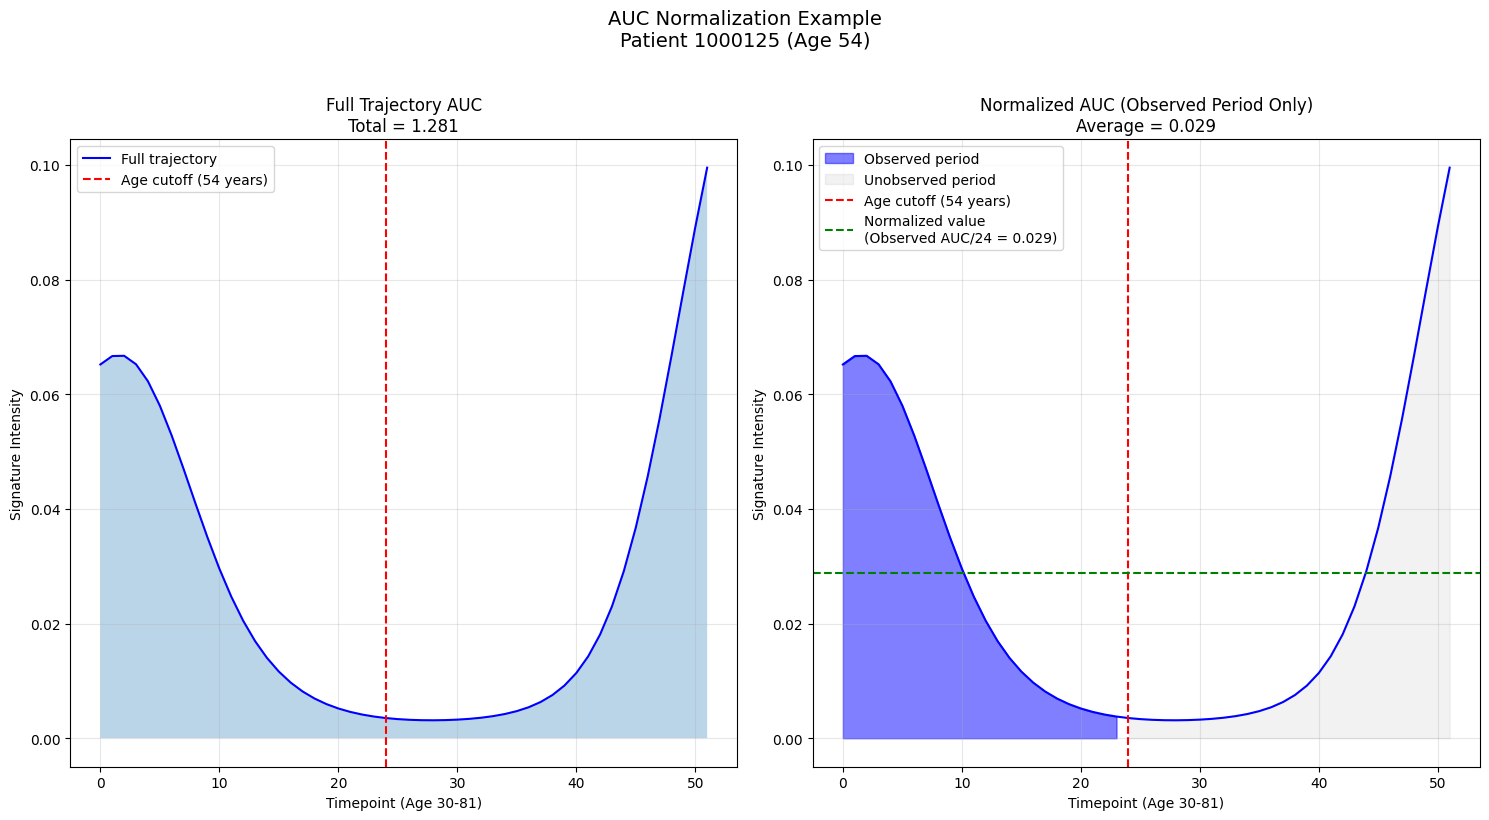

In [83]:
# Create figure
plt.figure(figsize=(15, 8))

# Example data for one signature
example_person = 10
example_sig = 10
age = ages[example_person]
timepoints = min(52, age - 29 - 1)

# Plot trajectory
plt.subplot(1, 2, 1)
plt.fill_between(range(52), 0, all_thetas[example_person, example_sig, :], alpha=0.3)
plt.plot(range(52), all_thetas[example_person, example_sig, :], 'b-', label='Full trajectory')
plt.axvline(x=timepoints, color='r', linestyle='--', label=f'Age cutoff ({age} years)')
plt.title(f'Full Trajectory AUC\nTotal = {theta_aucs[example_person, example_sig]:.3f}')
plt.xlabel('Timepoint (Age 30-81)')
plt.ylabel('Signature Intensity')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot normalized version with observed period highlighted
plt.subplot(1, 2, 2)
plt.fill_between(range(timepoints), 0, all_thetas[example_person, example_sig, :timepoints], 
                 alpha=0.5, color='blue', label='Observed period')
plt.fill_between(range(timepoints, 52), 0, all_thetas[example_person, example_sig, timepoints:], 
                 alpha=0.1, color='gray', label='Unobserved period')
plt.plot(range(52), all_thetas[example_person, example_sig, :], 'b-')
plt.axvline(x=timepoints, color='r', linestyle='--', label=f'Age cutoff ({age} years)')
plt.axhline(y=normalized_aucs[example_person, example_sig], color='g', linestyle='--', 
           label=f'Normalized value\n(Observed AUC/{timepoints} = {normalized_aucs[example_person, example_sig]:.3f})')
plt.title(f'Normalized AUC (Observed Period Only)\nAverage = {normalized_aucs[example_person, example_sig]:.3f}')
plt.xlabel('Timepoint (Age 30-81)')
plt.ylabel('Signature Intensity')
plt.legend()
plt.grid(True, alpha=0.3)

plt.suptitle(f'AUC Normalization Example\nPatient {matched_bpc.iloc[example_person]["identifier"]} (Age {age})', 
            y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

In [82]:
# For this example person
# Get the exact values
example_person = 10  # index for patient 1000125
example_sig = 10
age = ages[example_person]  # should be 54
timepoints = age - 29 - 1  # should be 24

# Raw values
raw_auc = theta_aucs[example_person, example_sig]  # should be 1.281
norm_auc = normalized_aucs[example_person, example_sig]  # is 0.029

print(f"Age: {age}")
print(f"Timepoints used: {timepoints}")
print(f"Raw AUC: {raw_auc}")
print(f"Normalized AUC: {norm_auc}")

# Let's also look at the actual calculation
trajectory = all_thetas[example_person, example_sig, :timepoints]
manual_auc = np.trapz(trajectory, np.arange(timepoints))
manual_norm = manual_auc / timepoints

print(f"\nManual calculation:")
print(f"Manual AUC: {manual_auc}")
print(f"Manual normalized: {manual_norm}")

Age: 54
Timepoints used: 24
Raw AUC: 1.2811217572663383
Normalized AUC: 0.02878727783423238

Manual calculation:
Manual AUC: 0.6908946680215772
Manual normalized: 0.02878727783423238


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/1247891152.py:19: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  manual_auc = np.trapz(trajectory, np.arange(timepoints))


In [ ]:

normalized_auc = raw_auc / timepoints
print(f"Normalized AUC should be: {normalized_auc:.3f}")  # Should be ≈ 0.053

# Update visualization code to ensure correct normalized value plotting
plt.axhline(y=normalized_auc, color='g', linestyle='--', 
           label=f'Normalized value\n(AUC/{timepoints} = {normalized_auc:.3f})')

In [85]:
# In Python:
import torch
import numpy as np

# Load the PyTorch tensor
Y_tensor = torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/Y_tensor.pt")

# Convert to numpy array
Y_numpy = Y_tensor.numpy()

# Save as numpy array
np.save('Y_array.npy', Y_numpy)

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_47946/3337320567.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y_tensor = torch.load("/Users/sarahurbut/Drop

In [141]:
# Look at lambda values across time for first person, first signature
print("Lambda values across time (person 0, signature 0):")
print(all_lambdas[0, 0, :])

# Let's also look at the mean across all timepoints (before taking max)
print("\nMean lambda before taking max:")
print("Mean across all dimensions:", np.mean(all_lambdas))
print("Mean across people and time for each signature:")
for sig in range(20):
    print(f"Signature {sig+1}: {np.mean(all_lambdas[:, sig, :]):.4f}")

Lambda values across time (person 0, signature 0):
[-0.97246844 -0.97156751 -0.95896935 -0.93358129 -0.89460641 -0.84161705
 -0.77464342 -0.69413167 -0.60099077 -0.4965362  -0.38246843 -0.26077977
 -0.1336567  -0.00332997  0.12789893  0.25791314  0.3848049   0.50694793
  0.62305105  0.73224109  0.83394819  0.92792988  1.01422715  1.09303355
  1.1646291   1.22931647  1.28728104  1.33857441  1.38303626  1.42035031
  1.44990563  1.4710176   1.48293328  1.48489487  1.4762671   1.45668697
  1.42607749  1.38479793  1.33370399  1.27409756  1.20778573  1.13698697
  1.06427026  0.9924255   0.92430037  0.8627193   0.81027436  0.76914525
  0.74107599  0.72720611  0.72802496  0.74334592]

Mean lambda before taking max:
Mean across all dimensions: -0.0002805107205678313
Mean across people and time for each signature:
Signature 1: 0.0071
Signature 2: 0.0001
Signature 3: -0.0024
Signature 4: -0.0046
Signature 5: 0.0008
Signature 6: -0.0156
Signature 7: -0.0012
Signature 8: 0.0090
Signature 9: -0.0046

In [139]:
all_lambdas

array([[[-9.72468436e-01, -9.71567512e-01, -9.58969355e-01, ...,
          7.27206111e-01,  7.28024960e-01,  7.43345916e-01],
        [ 1.09564531e+00,  1.07519448e+00,  1.05129600e+00, ...,
         -6.81177676e-02, -6.38196021e-02, -4.87865806e-02],
        [ 9.54206586e-01,  9.57348943e-01,  9.43076611e-01, ...,
          4.39828008e-01,  3.61439556e-01,  2.87209004e-01],
        ...,
        [-5.67668676e-01, -6.42190874e-01, -7.11026847e-01, ...,
         -1.37222672e+00, -1.34143424e+00, -1.28889871e+00],
        [-7.20167160e-01, -7.14601636e-01, -7.10028291e-01, ...,
          3.38450253e-01,  3.08193982e-01,  2.77857155e-01],
        [ 9.42958593e-02,  1.42019673e-03, -8.94123912e-02, ...,
          1.87509251e+00,  1.81850469e+00,  1.75791097e+00]],

       [[-1.11385918e+00, -1.13852382e+00, -1.15815556e+00, ...,
          5.30274391e-01,  4.73810285e-01,  3.99507314e-01],
        [ 2.04134881e-01,  2.17365623e-01,  2.30911449e-01, ...,
         -9.47873294e-02, -1.82343066e

In [45]:
# Print out all processed ranges in order
print("Processed ranges in order:")
for start, end in processed_ranges:
    print(f"{start}-{end}")

# Check for overlaps
print("\nChecking for overlaps...")
processed_ranges.sort()  # Make sure they're in order
for i in range(len(processed_ranges)-1):
    current_end = processed_ranges[i][1]
    next_start = processed_ranges[i+1][0]
    if current_end != next_start:
        print(f"WARNING: Gap or overlap between {processed_ranges[i]} and {processed_ranges[i+1]}")

# Let's also verify the actual data
print("\nVerifying data at transition points...")
for i in range(len(processed_ranges)-1):
    current_end = processed_ranges[i][1]
    next_start = processed_ranges[i+1][0]
    
    print(f"\nTransition from batch {processed_ranges[i]} to {processed_ranges[i+1]}")
    print(f"Last 3 IDs of batch {i}: {patient_ids[current_end-3:current_end]}")
    print(f"First 3 IDs of batch {i+1}: {patient_ids[next_start:next_start+3]}")

Processed ranges in order:
0-10000
10000-20000
20000-30000
30000-40000
40000-50000
50000-60000
60000-70000
70000-80000
80000-90000
90000-100000
100000-110000
110000-120000
120000-130000
130000-140000
140000-150000
150000-160000
160000-170000
170000-180000
180000-190000
190000-200000
200000-210000
210000-220000
220000-230000
230000-240000
240000-250000
250000-260000
260000-270000
270000-280000
280000-290000
290000-300000
300000-310000
310000-320000
320000-330000
330000-340000
340000-350000
350000-360000
360000-370000
370000-380000
380000-390000
390000-400000

Checking for overlaps...

Verifying data at transition points...

Transition from batch (0, 10000) to (10000, 20000)
Last 3 IDs of batch 0: ['1123575', '1123587', '1123600']
First 3 IDs of batch 1: ['1123614', '1123622', '1123633']

Transition from batch (10000, 20000) to (20000, 30000)
Last 3 IDs of batch 1: ['1247203', '1247224', '1247230']
First 3 IDs of batch 2: ['1247245', '1247256', '1247268']

Transition from batch (20000, 3

In [46]:
# Let's verify this with a small example
print("First batch end:")
print(f"Last ID in batch 0-10000: {patient_ids[9999]}")  # Last ID of first batch
print(f"First ID in batch 10000-20000: {patient_ids[10000]}")  # First ID of second batch

# Verify no overlap
print("\nVerifying no overlap:")
batch1_end = set(patient_ids[9990:10000])    # Last 10 IDs of first batch
batch2_start = set(patient_ids[10000:10010])  # First 10 IDs of second batch
print(f"Any IDs in both sets? {len(batch1_end.intersection(batch2_start)) > 0}")

First batch end:
Last ID in batch 0-10000: 1123600
First ID in batch 10000-20000: 1123614

Verifying no overlap:
Any IDs in both sets? False


In [137]:
# Find the batch directory for 390000-400000
target_batch = "output_390000_400000"
last_batch_dir = [d for d in output_dirs if target_batch in d][0]
print(f"Checking batch directory: {last_batch_dir}")

# Load the model from this batch
checkpoint = torch.load(os.path.join(last_batch_dir, 'model.pt'))

# Get the indices and Y values that were used for this batch
batch_indices = checkpoint['indices']  # The indices used in this batch
batch_Y = checkpoint['Y']  # The Y values used in this batch

# Load the full Y tensor for comparison
Yt = torch.load("/Users/sarahurbut/Dropbox (Personal)/filesforupload/Y_tensor.pt")

# Check the last few examples
print("\nVerifying final batch data:")
for i in range(-5, 0):  # Look at last 5 patients in the batch
    batch_idx = batch_indices[i]  # Index in the original data
    print(f"\nPatient {batch_idx}:")
    print(f"Patient ID: {patient_ids[batch_idx]}")
    
    # Compare Y values
    batch_y = batch_Y[i]  # Y values used in the batch
    full_y = Yt[batch_idx]  # Y values from full tensor
    
    # Find where diseases occurred
    disease_timepoints = torch.where(batch_y == 1)
    if len(disease_timepoints[0]) > 0:
        print("Disease occurrences in batch:")
        for d, t in zip(*disease_timepoints):
            print(f"Disease {d} at timepoint {t}")
            # Verify this matches the full Y tensor
            assert full_y[d, t] == 1, f"Mismatch at disease {d}, timepoint {t}"

Checking batch directory: /Users/sarahurbut/Dropbox (Personal)/from_AWS/10kbatches_sameseed/output_390000_400000_20241226_102603


/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/197857465.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(os.path.join(last_batc


Verifying final batch data:

Patient 399995:
Patient ID: 5929605
Disease occurrences in batch:
Disease 47 at timepoint 17
Disease 79 at timepoint 7
Disease 254 at timepoint 24
Disease 284 at timepoint 17

Patient 399996:
Patient ID: 5929616
Disease occurrences in batch:
Disease 203 at timepoint 27
Disease 294 at timepoint 6
Disease 299 at timepoint 28
Disease 344 at timepoint 28

Patient 399997:
Patient ID: 5929627
Disease occurrences in batch:
Disease 10 at timepoint 42
Disease 57 at timepoint 46
Disease 58 at timepoint 46
Disease 60 at timepoint 42
Disease 89 at timepoint 48
Disease 109 at timepoint 48
Disease 112 at timepoint 46
Disease 128 at timepoint 42
Disease 131 at timepoint 46
Disease 145 at timepoint 42
Disease 168 at timepoint 46
Disease 170 at timepoint 46
Disease 171 at timepoint 46
Disease 178 at timepoint 38
Disease 180 at timepoint 42
Disease 197 at timepoint 46
Disease 203 at timepoint 42
Disease 210 at timepoint 46
Disease 269 at timepoint 36
Disease 281 at timepoin

In [138]:
# Let's verify patient 399999 (our last patient) against the Y tensor
last_idx = 399999
print(f"Verifying patient ID {patient_ids[last_idx]} (index {last_idx}):")

# Get Y values from both sources
y_from_batch = batch_Y[-1]  # Last patient in the batch
y_from_tensor = Yt[last_idx]  # Same patient in full tensor

# Compare disease occurrences
print("\nChecking Y tensor:")
tensor_diseases = torch.where(y_from_tensor == 1)
if len(tensor_diseases[0]) > 0:
    print("Disease occurrences in Y tensor:")
    for d, t in zip(*tensor_diseases):
        print(f"Disease {d} at timepoint {t}")

# Verify they match exactly
diseases_match = torch.all(y_from_batch == y_from_tensor)
print(f"\nDo Y values match exactly? {diseases_match}")

# Also check a specific disease occurrence from the list
# For example, verify Disease 79 at timepoint 25
print(f"\nVerifying specific disease occurrence:")
print(f"Disease 79, timepoint 25 in batch Y: {y_from_batch[79, 25]}")
print(f"Disease 79, timepoint 25 in Y tensor: {y_from_tensor[79, 25]}")

Verifying patient ID 5929643 (index 399999):

Checking Y tensor:
Disease occurrences in Y tensor:
Disease 79 at timepoint 25
Disease 87 at timepoint 37
Disease 92 at timepoint 34
Disease 145 at timepoint 37
Disease 201 at timepoint 37
Disease 225 at timepoint 37
Disease 299 at timepoint 37
Disease 332 at timepoint 37
Disease 336 at timepoint 40

Do Y values match exactly? True

Verifying specific disease occurrence:
Disease 79, timepoint 25 in batch Y: 1.0
Disease 79, timepoint 25 in Y tensor: 1.0


In [69]:
all_lambdas[1,1,:]

array([ 0.20413488,  0.21736562,  0.23091145,  0.24547055,  0.26165587,
        0.27994749,  0.30064756,  0.32378125,  0.34916401,  0.37634063,
        0.40462556,  0.43315411,  0.46091533,  0.48688394,  0.51003999,
        0.52950007,  0.54457837,  0.55486327,  0.56024164,  0.56095457,
        0.55757529,  0.550955  ,  0.5421983 ,  0.53256631,  0.52338463,
        0.5159148 ,  0.51125938,  0.51026201,  0.51343566,  0.52088815,
        0.53227633,  0.54682457,  0.56336963,  0.58040059,  0.59613395,
        0.60867625,  0.61608684,  0.61655253,  0.60842836,  0.59044385,
        0.56171596,  0.5218395 ,  0.47088966,  0.40947041,  0.33864847,
        0.25989029,  0.17502795,  0.08613784, -0.00455711, -0.09478733,
       -0.18234307, -0.2651625 ])

In [64]:
t=torch.load('/Users/sarahurbut/Dropbox (Personal)/10kbatches_sameseed/output_0_10000_20241225_062028/model.pt')

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/3104653736.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  t=torch.load('/Users/sarahurbut/Dropbox (Pers

In [50]:
all_lambdas

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
def analyze_cluster_patterns(model_path):
    # Load the saved model
    checkpoint = torch.load(model_path)
    
    # Extract relevant components
    disease_names = checkpoint['disease_names']
    clusters = checkpoint['clusters']
    phi = checkpoint['model_state_dict']['phi']
    psi = checkpoint['model_state_dict']['psi']
    
    # Convert tensors to numpy if needed
    if torch.is_tensor(phi):
        phi = phi.detach().numpy()
    if torch.is_tensor(psi):
        psi = psi.detach().numpy()
    
    # For each cluster
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        # Get diseases in this cluster
        cluster_diseases = np.where(clusters == cluster)[0]
        
        print(f"\nCluster {cluster} diseases:")
        print("------------------------")
        
        # Get average phi values for diseases in this cluster
        cluster_phi = phi[:, cluster_diseases, :].mean(axis=2)  # Average over time
        
        # Find which signature has strongest effect on these diseases
        dominant_signature = np.argmax(np.abs(cluster_phi).mean(axis=1))
        
        # Sort diseases by their strength in the dominant signature
        disease_strengths = phi[dominant_signature, cluster_diseases, :].mean(axis=1)
        sorted_indices = np.argsort(np.abs(disease_strengths))[::-1]
        
        # Print top 5 most characteristic diseases
        print(f"Top diseases (strongest in signature {dominant_signature}):")
        for idx in sorted_indices[:5]:
            disease_idx = cluster_diseases[idx]
            strength = disease_strengths[idx]
            print(f"- {disease_names[disease_idx]}: strength = {strength:.3f}")
            
        # Find diseases that appear in other signatures
        other_sigs = np.delete(np.arange(phi.shape[0]), dominant_signature)
        non_specific_diseases = []
        
        for disease_idx in cluster_diseases:
            disease_phi = phi[:, disease_idx, :].mean(axis=1)  # Average over time
            if np.any(np.abs(disease_phi[other_sigs]) > 0.5 * np.abs(disease_phi[dominant_signature])):
                non_specific_diseases.append(disease_idx)
        
        if non_specific_diseases:
            print("\nNon-specific diseases (strong effects in multiple signatures):")
            for disease_idx in non_specific_diseases[:5]:  # Show up to 5 examples
                disease_phi = phi[:, disease_idx, :].mean(axis=1)
                print(f"\n{disease_names[disease_idx]}:")
                for sig in range(len(disease_phi)):
                    if abs(disease_phi[sig]) > 0.1:  # Show only significant effects
                        print(f"  Signature {sig}: {disease_phi[sig]:.3f}")

def plot_disease_patterns(model_path, disease_indices, title=None):
    """
    Plot temporal patterns for specific diseases across all signatures
    """
    checkpoint = torch.load(model_path)
    phi = checkpoint['model_state_dict']['phi']
    disease_names = checkpoint['disease_names']
    
    if torch.is_tensor(phi):
        phi = phi.detach().numpy()
    
    n_signatures = phi.shape[0]
    n_timepoints = phi.shape[2]
    
    plt.figure(figsize=(15, 5 * len(disease_indices)))
    
    for i, disease_idx in enumerate(disease_indices):
        plt.subplot(len(disease_indices), 1, i+1)
        
        for sig in range(n_signatures):
            plt.plot(range(n_timepoints), phi[sig, disease_idx, :], 
                    label=f'Signature {sig}')
        
        plt.title(f"{disease_names[disease_idx]} Temporal Patterns")
        plt.xlabel('Time')
        plt.ylabel('Effect Size')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
    
    if title:
        plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Usage:
model_path = '/path/to/your/model.pt'
analyze_cluster_patterns(model_path)

# After identifying interesting diseases, plot their patterns:
interesting_diseases = [10, 20, 30]  # Replace with actual disease indices
plot_disease_patterns(model_path, interesting_diseases, 
                     title="Comparison of Cluster-Specific vs Non-Specific Diseases")

In [6]:
# verify initialiation
import torch
import os

# Load the three models
model_paths = [
    'results/output_0_10000_20241224_154530/model.pt',
    'results/output_20000_30000_20241224_154713/model.pt',
    'results/output_50000_60000_20241224_154856/model.pt'
]

initial_phis = []
batch_info = []

# Load each model and extract initial phi
for path in model_paths:
    checkpoint = torch.load(path)
    initial_phi = checkpoint['initial_phi']  # Assuming we saved initial_phi
    initial_phis.append(initial_phi)
    
    # Get batch info from path
    dir_name = os.path.basename(os.path.dirname(path))
    batch_info.append(dir_name)

# Compare initial phis
print("\nComparing initial phis:")
for i in range(len(initial_phis)):
    for j in range(i+1, len(initial_phis)):
        diff = torch.abs(initial_phis[i] - initial_phis[j]).max()
        print(f"Max difference between {batch_info[i]} and {batch_info[j]}: {diff:.6f}")

# If they're not identical, let's look at where they differ
if diff > 1e-6:  # if there are meaningful differences
    # Look at specific signature/disease combinations
    k, d = 1, 0  # Signature 1, Disease 0 (from your plot)
    print(f"\nComparing values for Signature {k}, Disease {d}:")
    for i, phi in enumerate(initial_phis):
        print(f"\n{batch_info[i]}:")
        print(phi[k, d, :])  # Print the full trajectory

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/1662465921.py:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)



Comparing initial phis:
Max difference between output_0_10000_20241224_154530 and output_20000_30000_20241224_154713: 6.381223
Max difference between output_0_10000_20241224_154530 and output_50000_60000_20241224_154856: 5.794329
Max difference between output_20000_30000_20241224_154713 and output_50000_60000_20241224_154856: 5.582039

Comparing values for Signature 1, Disease 0:

output_0_10000_20241224_154530:
tensor([-13.6336, -13.6174, -13.5620, -13.4702, -13.3499, -13.2084, -13.0516,
        -12.8876, -12.7173, -12.5471, -12.3843, -12.2211, -12.0653, -11.9177,
        -11.7781, -11.6455, -11.5197, -11.4053, -11.3003, -11.2090, -11.1262,
        -11.0592, -11.0024, -10.9609, -10.9343, -10.9234, -10.9248, -10.9423,
        -10.9747, -11.0211, -11.0806, -11.1481, -11.2308, -11.3210, -11.4169,
        -11.5189, -11.6237, -11.7309, -11.8402, -11.9507, -12.0614, -12.1706,
        -12.2786, -12.3818, -12.4800, -12.5684, -12.6478, -12.7097, -12.7477,
        -12.7623, -12.7469, -12.7022]

In [7]:
def test_random_seed_persistence():
    # Test 1: Basic torch random numbers
    torch.manual_seed(42)
    print("\nTest 1: Basic random numbers")
    for i in range(3):
        print(f"Batch {i}:", torch.randn(5))
    
    # Test 2: With model-like GP sampling
    print("\nTest 2: GP-like sampling")
    torch.manual_seed(42)
    for batch in range(3):
        print(f"\nBatch {batch}:")
        # Simulate what happens in initialize_params
        L = torch.tensor([[2.0, 0.0], [1.0, 1.0]])  # Simple triangular matrix
        for k in range(2):
            eps = L @ torch.randn(2)
            print(f"k={k}:", eps)

# Run the test multiple times
for run in range(2):
    print(f"\nRUN {run}")
    test_random_seed_persistence()


RUN 0

Test 1: Basic random numbers
Batch 0: tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229])
Batch 1: tensor([-0.1863,  2.2082, -0.6380,  0.4617,  0.2674])
Batch 2: tensor([ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890])

Test 2: GP-like sampling

Batch 0:
k=0: tensor([0.6734, 0.4655])
k=1: tensor([0.4689, 0.4648])

Batch 1:
k=0: tensor([-2.2457, -1.3092])
k=1: tensor([4.4164, 1.5702])

Batch 2:
k=0: tensor([0.9233, 0.7290])
k=1: tensor([1.0698, 1.3443])

RUN 1

Test 1: Basic random numbers
Batch 0: tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229])
Batch 1: tensor([-0.1863,  2.2082, -0.6380,  0.4617,  0.2674])
Batch 2: tensor([ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890])

Test 2: GP-like sampling

Batch 0:
k=0: tensor([0.6734, 0.4655])
k=1: tensor([0.4689, 0.4648])

Batch 1:
k=0: tensor([-2.2457, -1.3092])
k=1: tensor([4.4164, 1.5702])

Batch 2:
k=0: tensor([0.9233, 0.7290])
k=1: tensor([1.0698, 1.3443])


In [9]:
import torch
import os

# Load the three new models
model_paths = [
    'results/output_0_10000_20241224_155933/model.pt',
    'results/output_20000_30000_20241224_160033/model.pt',
    'results/output_50000_60000_20241224_160134/model.pt'
]

initial_phis = []
batch_info = []

# Load each model and extract initial phi
for path in model_paths:
    checkpoint = torch.load(path)
    initial_phi = checkpoint['initial_phi']
    initial_phis.append(initial_phi)
    
    # Get batch info from path
    dir_name = os.path.basename(os.path.dirname(path))
    batch_info.append(dir_name)

# Compare initial phis for signature 1, disease 0
k, d = 1, 0
print("\nComparing Signature 1, Disease 0 trajectories:")
for i, batch in enumerate(batch_info):
    print(f"\n{batch}:")
    print(initial_phis[i][k, d, :])

# Calculate max differences between batches
print("\nMax differences between batches:")
for i in range(len(initial_phis)):
    for j in range(i+1, len(initial_phis)):
        diff = torch.abs(initial_phis[i] - initial_phis[j]).max()
        print(f"Max difference between {batch_info[i]} and {batch_info[j]}: {diff:.6f}")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/931674136.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)



Comparing Signature 1, Disease 0 trajectories:

output_0_10000_20241224_155933:
tensor([-12.2591, -12.2489, -12.2013, -12.1217, -12.0126, -11.8842, -11.7397,
        -11.5901, -11.4350, -11.2803, -11.1312, -10.9859, -10.8463, -10.7124,
        -10.5870, -10.4690, -10.3578, -10.2559, -10.1648, -10.0832, -10.0133,
         -9.9527,  -9.9056,  -9.8712,  -9.8527,  -9.8476,  -9.8568,  -9.8822,
         -9.9221,  -9.9786, -10.0469, -10.1313, -10.2260, -10.3335, -10.4476,
        -10.5676, -10.6957, -10.8272, -10.9631, -11.1032, -11.2460, -11.3907,
        -11.5375, -11.6814, -11.8250, -11.9635, -12.0926, -12.2085, -12.3078,
        -12.3880, -12.4409, -12.4720])

output_20000_30000_20241224_160033:
tensor([-12.2591, -12.2489, -12.2013, -12.1217, -12.0126, -11.8842, -11.7397,
        -11.5901, -11.4350, -11.2803, -11.1312, -10.9859, -10.8463, -10.7124,
        -10.5870, -10.4690, -10.3578, -10.2559, -10.1648, -10.0832, -10.0133,
         -9.9527,  -9.9056,  -9.8712,  -9.8527,  -9.8476,  -9.8

In [11]:
import torch
import os

# Load the three new models
model_paths = [
    'results/output_0_10000_20241224_164101/model.pt',
    'results/output_20000_30000_20241224_164200/model.pt',
    'results/output_50000_60000_20241224_164257/model.pt'
]

initial_phis = []
batch_info = []

# Load each model and extract initial phi
for path in model_paths:
    checkpoint = torch.load(path)
    initial_phi = checkpoint['initial_phi']
    initial_phis.append(initial_phi)
    
    # Get batch info from path
    dir_name = os.path.basename(os.path.dirname(path))
    batch_info.append(dir_name)

# Compare initial phis for signature 1, disease 0
k, d = 1, 0
print("\nComparing Signature 1, Disease 0 trajectories:")
for i, batch in enumerate(batch_info):
    print(f"\n{batch}:")
    print(initial_phis[i][k, d, :])

# Calculate max differences between batches
print("\nMax differences between batches:")
for i in range(len(initial_phis)):
    for j in range(i+1, len(initial_phis)):
        diff = torch.abs(initial_phis[i] - initial_phis[j]).max()
        print(f"Max difference between {batch_info[i]} and {batch_info[j]}: {diff:.6f}")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/3428415070.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)



Comparing Signature 1, Disease 0 trajectories:

output_0_10000_20241224_164101:
tensor([-13.3435, -13.3436, -13.3088, -13.2362, -13.1345, -13.0095, -12.8667,
        -12.7069, -12.5430, -12.3674, -12.1872, -12.0040, -11.8178, -11.6290,
        -11.4342, -11.2392, -11.0435, -10.8493, -10.6511, -10.4587, -10.2699,
        -10.0860,  -9.9134,  -9.7484,  -9.5951,  -9.4565,  -9.3294,  -9.2206,
         -9.1286,  -9.0556,  -8.9969,  -8.9540,  -8.9318,  -8.9222,  -8.9255,
         -8.9414,  -8.9674,  -9.0056,  -9.0523,  -9.1078,  -9.1709,  -9.2385,
         -9.3167,  -9.3965,  -9.4766,  -9.5612,  -9.6376,  -9.7082,  -9.7641,
         -9.8025,  -9.8202,  -9.8154])

output_20000_30000_20241224_164200:
tensor([-13.3435, -13.3436, -13.3088, -13.2362, -13.1345, -13.0095, -12.8667,
        -12.7069, -12.5430, -12.3674, -12.1872, -12.0040, -11.8178, -11.6290,
        -11.4342, -11.2392, -11.0435, -10.8493, -10.6511, -10.4587, -10.2699,
        -10.0860,  -9.9134,  -9.7484,  -9.5951,  -9.4565,  -9.3

In [20]:
import torch
import os

# Load the three new models
model_paths = [
    'results/output_0_10000_20241224_171453/model.pt',
    'results/output_20000_30000_20241224_171556/model.pt',
    'results/output_50000_60000_20241224_171658/model.pt'
]

initial_phis = []
batch_info = []

# Load each model and extracret initial phi
for path in model_paths:
    checkpoint = torch.load(path)
    initial_phi = checkpoint['initial_phi']
    initial_phis.append(initial_phi)
    
    # Get batch info from path
    dir_name = os.path.basename(os.path.dirname(path))
    batch_info.append(dir_name)

# Compare initial phis for signature 1, disease 0
k, d = 1, 0
print("\nComparing Signature 1, Disease 0 trajectories:")
for i, batch in enumerate(batch_info):
    print(f"\n{batch}:")
    print(initial_phis[i][k, d, :])

# Calculate max differences between batches
print("\nMax differences between batches:")
for i in range(len(initial_phis)):
    for j in range(i+1, len(initial_phis)):
        diff = torch.abs(initial_phis[i] - initial_phis[j]).max()
        print(f"Max difference between {batch_info[i]} and {batch_info[j]}: {diff:.6f}")

/var/folders/2f/nxrbr3pn1msgrl4ffyj33zd00000gn/T/ipykernel_68206/2180824174.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)



Comparing Signature 1, Disease 0 trajectories:

output_0_10000_20241224_171453:
tensor([-12.2693, -12.1499, -12.0072, -11.8431, -11.6656, -11.4857, -11.3074,
        -11.1378, -10.9805, -10.8397, -10.7154, -10.6142, -10.5262, -10.4544,
        -10.3995, -10.3559, -10.3243, -10.3016, -10.2877, -10.2804, -10.2773,
        -10.2789, -10.2834, -10.2937, -10.3035, -10.3189, -10.3354, -10.3528,
        -10.3720, -10.3968, -10.4239, -10.4554, -10.4842, -10.5209, -10.5584,
        -10.5980, -10.6410, -10.6872, -10.7393, -10.7962, -10.8606, -10.9313,
        -11.0110, -11.0984, -11.1896, -11.2868, -11.3819, -11.4768, -11.5602,
        -11.6376, -11.6913, -11.7301])

output_20000_30000_20241224_171556:
tensor([-12.2693, -12.1499, -12.0072, -11.8431, -11.6656, -11.4857, -11.3074,
        -11.1378, -10.9805, -10.8397, -10.7154, -10.6142, -10.5262, -10.4544,
        -10.3995, -10.3559, -10.3243, -10.3016, -10.2877, -10.2804, -10.2773,
        -10.2789, -10.2834, -10.2937, -10.3035, -10.3189, -10.3

In [ ]:
import torch
import os

# Load the three new models
model_paths = [
    '/Users/sarahurbut/Downloads/cloud2/output_0_10000_20241224_224725/model.pt',
    '/Users/sarahurbut/Downloads/cloud2/output_20000_30000_20241224_225111/model.pt',
    '/Users/sarahurbut/Downloads/cloud2/output_10000_20000_20241224_224913/model.pt'
]


initial_phis = []
batch_info = []

# Load each model and extracret initial phi
for path in model_paths:
    checkpoint = torch.load(path)
    initial_phi = checkpoint['initial_phi']
    initial_phis.append(initial_phi)
    
    # Get batch info from path
    dir_name = os.path.basename(os.path.dirname(path))
    batch_info.append(dir_name)

# Compare initial phis for signature 1, disease 0
k, d = 1, 0
print("\nComparing Signature 1, Disease 0 trajectories:")
for i, batch in enumerate(batch_info):
    print(f"\n{batch}:")
    print(initial_phis[i][k, d, :])

# Calculate max differences between batches
print("\nMax differences between batches:")
for i in range(len(initial_phis)):
    for j in range(i+1, len(initial_phis)):
        diff = torch.abs(initial_phis[i] - initial_phis[j]).max()
        print(f"Max difference between {batch_info[i]} and {batch_info[j]}: {diff:.6f}")